#Comprehensive Analysis of NBA Draft Trends Evaluating Career Longevity, Performance Metrics, and Success of Top 3 Picks
#By Shaun McKellar Jr

#Import Packages and Load Dataset

In [1]:
import nbformat
from nbconvert import PDFExporter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
file_path = '/Users/shaunmckellarjr/Desktop/Shaun_Projects/NBA Draft Data/nbaplayersdraft.csv'
nba_draft_data = pd.read_csv(file_path)

#Inspect Data

In [2]:
print(nba_draft_data.head())

   id  year  rank  overall_pick team          player     college  \
0   1  1989     1             1  SAC  Pervis Ellison  Louisville   
1   2  1989     2             2  LAC     Danny Ferry        Duke   
2   3  1989     3             3  SAS    Sean Elliott     Arizona   
3   4  1989     4             4  MIA       Glen Rice    Michigan   
4   5  1989     5             5  CHH       J.R. Reid         UNC   

   years_active   games  minutes_played  ...  3_point_percentage  \
0          11.0   474.0         11593.0  ...               0.050   
1          13.0   917.0         18133.0  ...               0.393   
2          12.0   742.0         24502.0  ...               0.375   
3          15.0  1000.0         34985.0  ...               0.400   
4          11.0   672.0         15370.0  ...               0.135   

   free_throw_percentage  average_minutes_played  points_per_game  \
0                  0.689                    24.5              9.5   
1                  0.840                    

#Summary of Data

In [3]:
print(nba_draft_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1922 non-null   int64  
 1   year                       1922 non-null   int64  
 2   rank                       1922 non-null   int64  
 3   overall_pick               1922 non-null   int64  
 4   team                       1922 non-null   object 
 5   player                     1922 non-null   object 
 6   college                    1585 non-null   object 
 7   years_active               1669 non-null   float64
 8   games                      1669 non-null   float64
 9   minutes_played             1669 non-null   float64
 10  points                     1669 non-null   float64
 11  total_rebounds             1669 non-null   float64
 12  assists                    1669 non-null   float64
 13  field_goal_percentage      1665 non-null   float

# Check for missing values

In [4]:
print(nba_draft_data.isnull().sum())

id                             0
year                           0
rank                           0
overall_pick                   0
team                           0
player                         0
college                      337
years_active                 253
games                        253
minutes_played               253
points                       253
total_rebounds               253
assists                      253
field_goal_percentage        257
3_point_percentage           377
free_throw_percentage        289
average_minutes_played       253
points_per_game              253
average_total_rebounds       253
average_assists              253
win_shares                   253
win_shares_per_48_minutes    254
box_plus_minus               254
value_over_replacement       253
dtype: int64


# Descriptive Statistics

In [5]:
# Get basic descriptive statistics
print(nba_draft_data.describe())

                id         year         rank  overall_pick  years_active  \
count  1922.000000  1922.000000  1922.000000   1922.000000   1669.000000   
mean    961.500000  2005.317378    29.694589     29.694589      6.332534   
std     554.977927     9.456946    16.912454     16.912454      4.656321   
min       1.000000  1989.000000     1.000000      1.000000      1.000000   
25%     481.250000  1997.000000    15.000000     15.000000      2.000000   
50%     961.500000  2005.000000    30.000000     30.000000      5.000000   
75%    1441.750000  2013.000000    44.000000     44.000000     10.000000   
max    1922.000000  2021.000000    60.000000     60.000000     22.000000   

             games  minutes_played        points  total_rebounds  \
count  1669.000000     1669.000000   1669.000000     1669.000000   
mean    348.042540     8399.055722   3580.413421     1497.009587   
std     324.897567     9845.871529   4826.142847     2003.686388   
min       1.000000        0.000000      0.0

#Number of Players Drafted Per Year

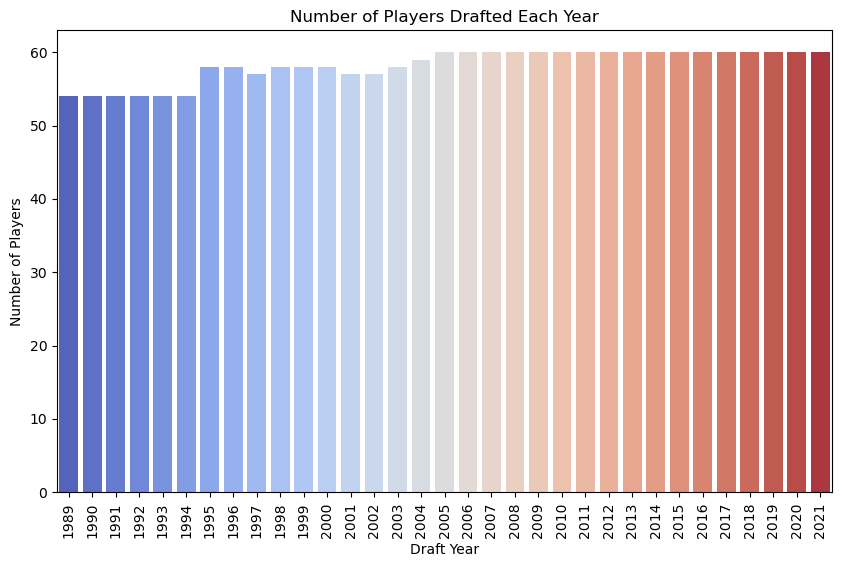

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=nba_draft_data, x='year', palette='coolwarm')
plt.title('Number of Players Drafted Each Year')
plt.xlabel('Draft Year')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
    
plt.show()

#Career Points by Draft Pick

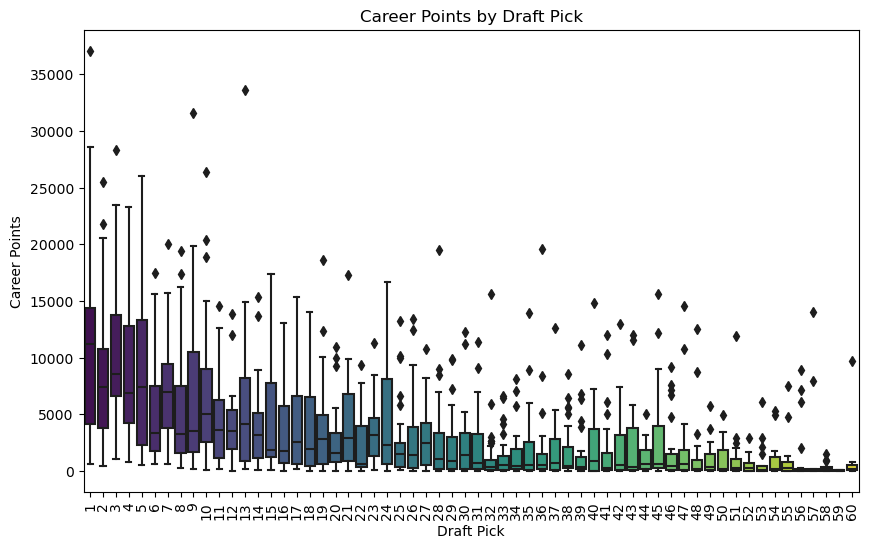

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=nba_draft_data, x='overall_pick', y='points', palette='viridis')
plt.title('Career Points by Draft Pick')
plt.xlabel('Draft Pick')
plt.ylabel('Career Points')
plt.xticks(rotation=90)
plt.show()

In [8]:
# Ensure relevant columns are in the correct data type
nba_draft_data['overall_pick'] = nba_draft_data['overall_pick'].astype(int)
nba_draft_data['years_active'] = nba_draft_data['years_active'].astype(float)

In [9]:
# Drop rows with missing values in the relevant columns
nba_draft_data = nba_draft_data.dropna(subset=['overall_pick', 'years_active'])

In [10]:
# Compute the correlation
correlation = nba_draft_data[['overall_pick', 'years_active']].corr()
print(correlation)

              overall_pick  years_active
overall_pick       1.00000      -0.42805
years_active      -0.42805       1.00000


# Scatter plot to visualize Draft Position vs Career Longevity

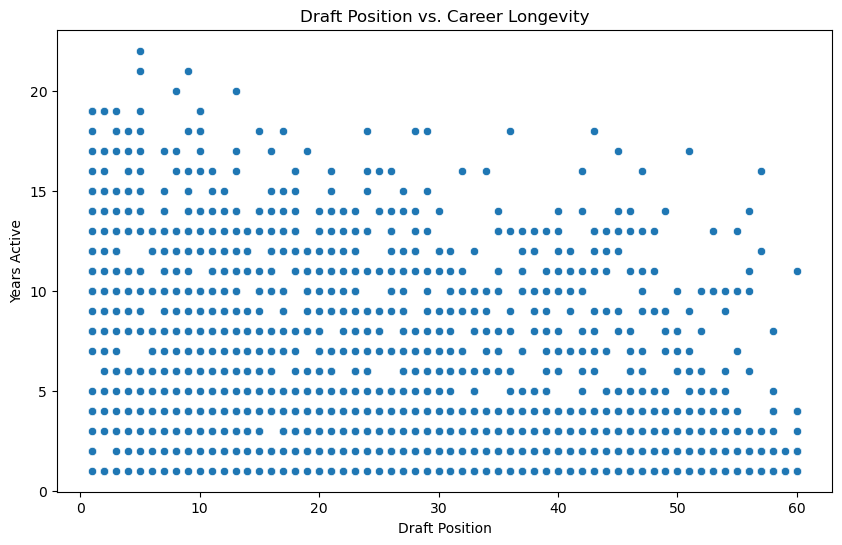

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nba_draft_data, x='overall_pick', y='years_active')
plt.title('Draft Position vs. Career Longevity')
plt.xlabel('Draft Position')
plt.ylabel('Years Active')
plt.show()

#Correlation heatmap that showcases Between Draft Position and Career Longevity

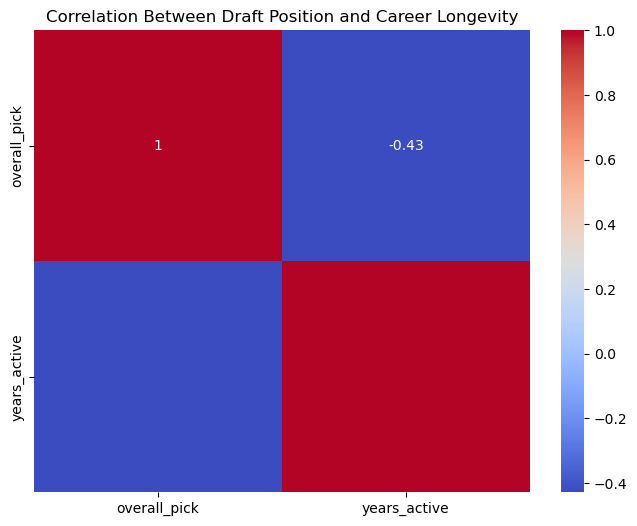

In [12]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Draft Position and Career Longevity')
plt.show()

#Avg performance metrics for numeric columns only

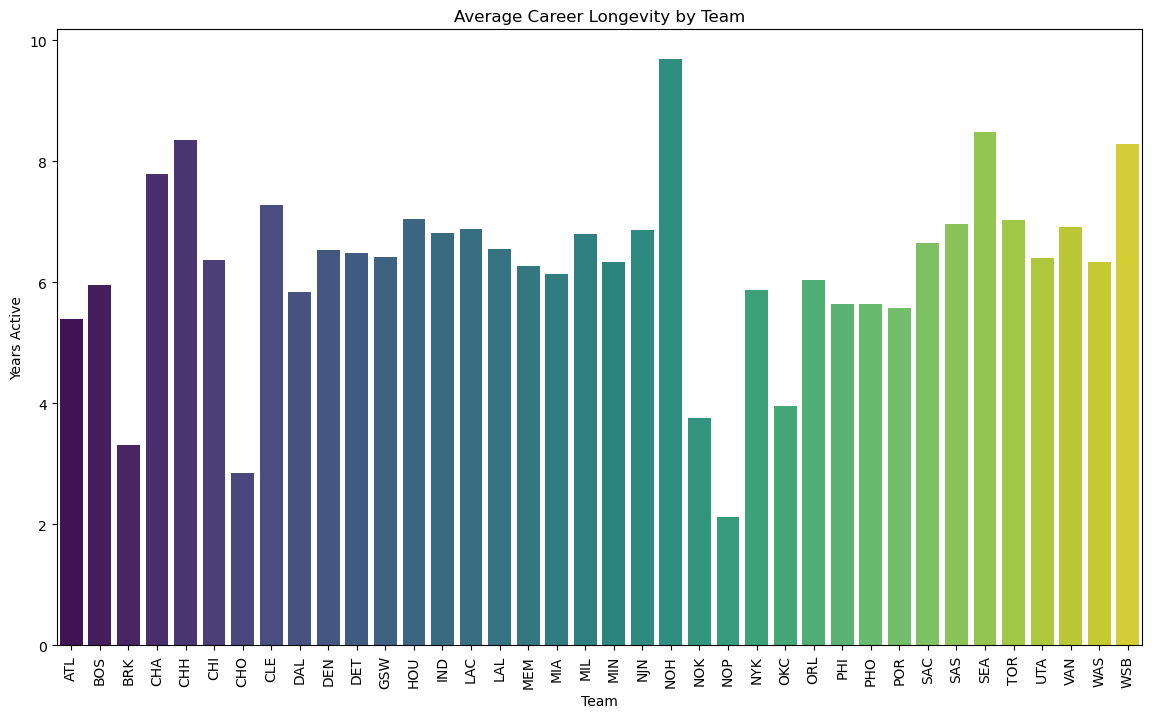

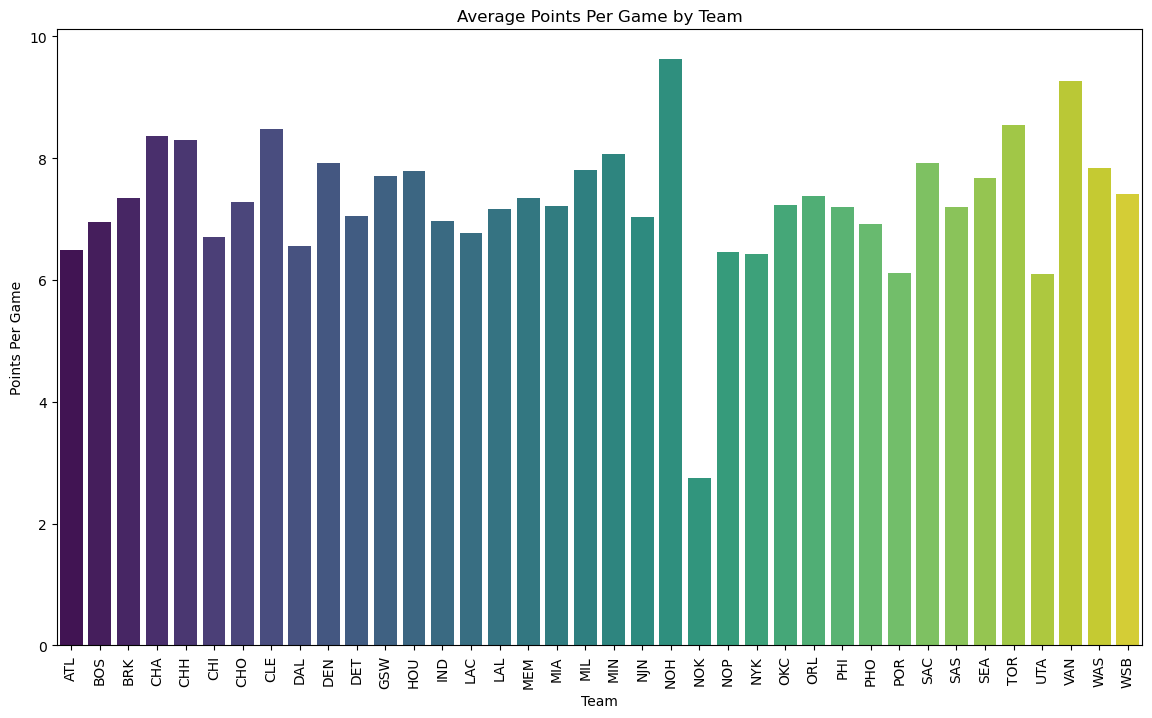

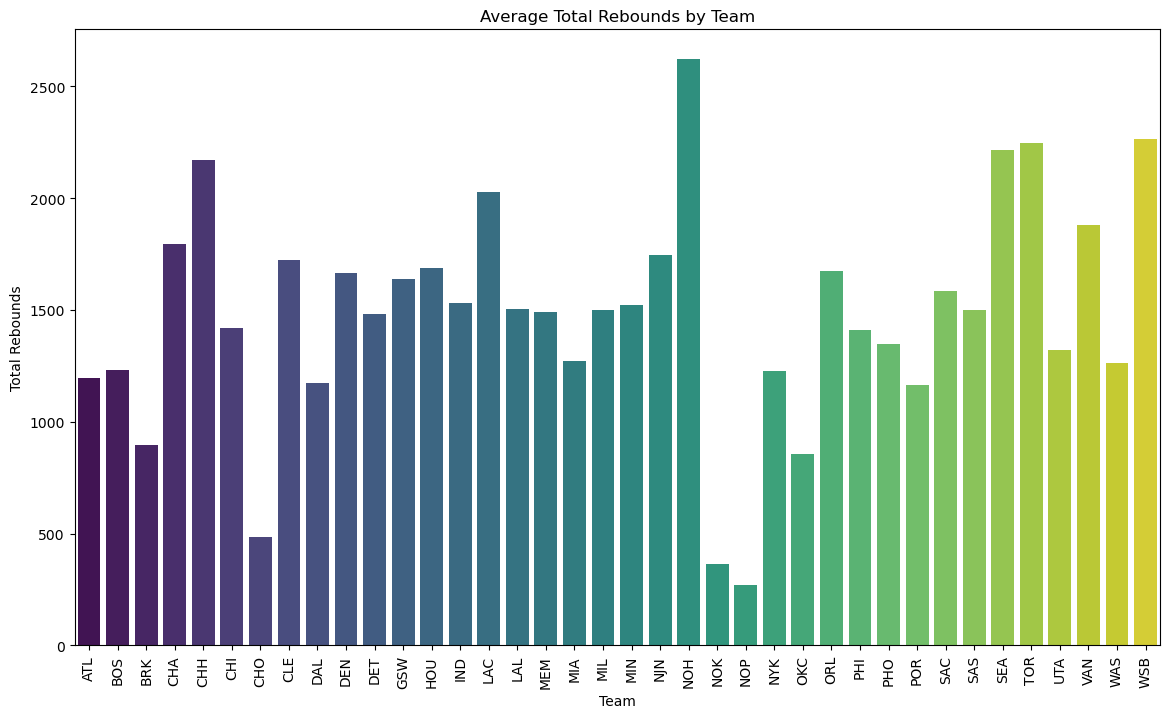

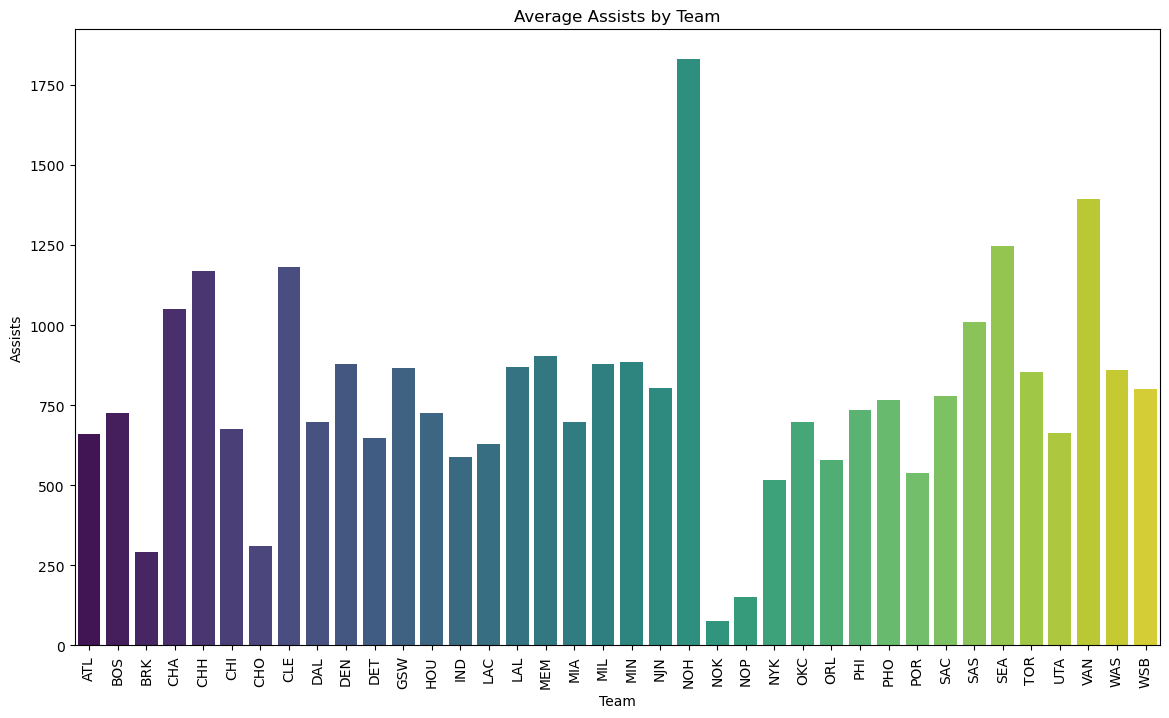

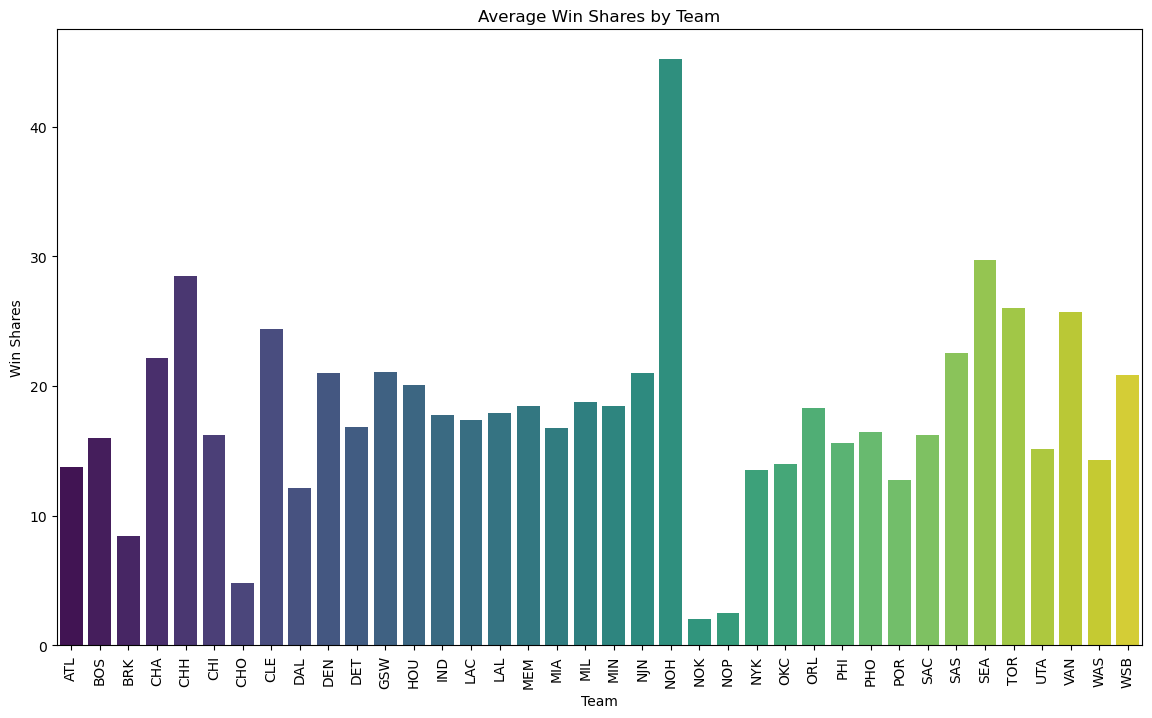

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features for the analysis
features = ['team', 'player', 'years_active', 'points_per_game', 'total_rebounds', 'assists', 'win_shares']

# Filter the data to include only the relevant features
nba_draft_data_filtered = nba_draft_data[features]

# Group by team and calculate mean performance metrics for numeric columns only
numeric_columns = ['years_active', 'points_per_game', 'total_rebounds', 'assists', 'win_shares']
team_summary = nba_draft_data_filtered.groupby('team')[numeric_columns].mean().reset_index()

# Plot career longevity by team
plt.figure(figsize=(14, 8))
sns.barplot(data=team_summary, x='team', y='years_active', palette='viridis')
plt.title('Average Career Longevity by Team')
plt.xlabel('Team')
plt.ylabel('Years Active')
plt.xticks(rotation=90)
plt.show()

# Plot points per game by team
plt.figure(figsize=(14, 8))
sns.barplot(data=team_summary, x='team', y='points_per_game', palette='viridis')
plt.title('Average Points Per Game by Team')
plt.xlabel('Team')
plt.ylabel('Points Per Game')
plt.xticks(rotation=90)
plt.show()

# Plot total rebounds by team
plt.figure(figsize=(14, 8))
sns.barplot(data=team_summary, x='team', y='total_rebounds', palette='viridis')
plt.title('Average Total Rebounds by Team')
plt.xlabel('Team')
plt.ylabel('Total Rebounds')
plt.xticks(rotation=90)
plt.show()

# Plot assists by team
plt.figure(figsize=(14, 8))
sns.barplot(data=team_summary, x='team', y='assists', palette='viridis')
plt.title('Average Assists by Team')
plt.xlabel('Team')
plt.ylabel('Assists')
plt.xticks(rotation=90)
plt.show()

# Plot win shares by team
plt.figure(figsize=(14, 8))
sns.barplot(data=team_summary, x='team', y='win_shares', palette='viridis')
plt.title('Average Win Shares by Team')
plt.xlabel('Team')
plt.ylabel('Win Shares')
plt.xticks(rotation=90)
plt.show()


#Late picks with long careers

In [14]:
# Check outliers: Late picks with long careers
late_picks_long_careers = nba_draft_data[(nba_draft_data['overall_pick'] > 30) & (nba_draft_data['years_active'] > 10)]
print(late_picks_long_careers)

        id  year  rank  overall_pick team             player        college  \
35      36  1989    36            36  POR  Clifford Robinson          UConn   
37      38  1989    38            38  MIN          Doug West      Villanova   
42      43  1989    43            43  CLE       Chucky Brown       NC State   
88      89  1990    35            35  WSB        Greg Foster  Texas-El Paso   
91      92  1990    38            38  SEA       Jud Buechler        Arizona   
...    ...   ...   ...           ...  ...                ...            ...   
1118  1119  2008    37            37  MIL   Luc Mbah a Moute           UCLA   
1126  1127  2008    45            45  SAS       Goran Dragić            NaN   
1187  1188  2009    46            46  CLE        Danny Green            UNC   
1196  1197  2009    55            55  POR        Patty Mills   Saint Mary's   
1321  1322  2011    60            60  SAC      Isaiah Thomas     Washington   

      years_active   games  minutes_played  ...  3_

In [15]:
# Define the dependent and independent variables
X = nba_draft_data[['overall_pick']]
y = nba_draft_data['years_active']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           years_active   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     374.0
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.48e-75
Time:                        12:57:39   Log-Likelihood:                -4766.1
No. Observations:                1669   AIC:                             9536.
Df Residuals:                    1667   BIC:                             9547.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.6668      0.201     48.126   

In [16]:
# Drop rows with missing values in the relevant columns
relevant_columns = ['years_active', 'overall_pick', 'games', 'minutes_played', 'points', 'total_rebounds', 
                    'assists', 'points_per_game', 'average_total_rebounds', 'average_assists', 'win_shares', 
                    'win_shares_per_48_minutes', 'box_plus_minus', 'value_over_replacement', 
                    'field_goal_percentage', '3_point_percentage', 'free_throw_percentage', 'rank']
nba_draft_data = nba_draft_data.dropna(subset=relevant_columns)

#Building and Evaluating a Linear Regression Model for NBA Player Career Longevity

                            OLS Regression Results                            
Dep. Variable:           years_active   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1986.
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        12:57:39   Log-Likelihood:                -2152.9
No. Observations:                1529   AIC:                             4340.
Df Residuals:                    1512   BIC:                             4430.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

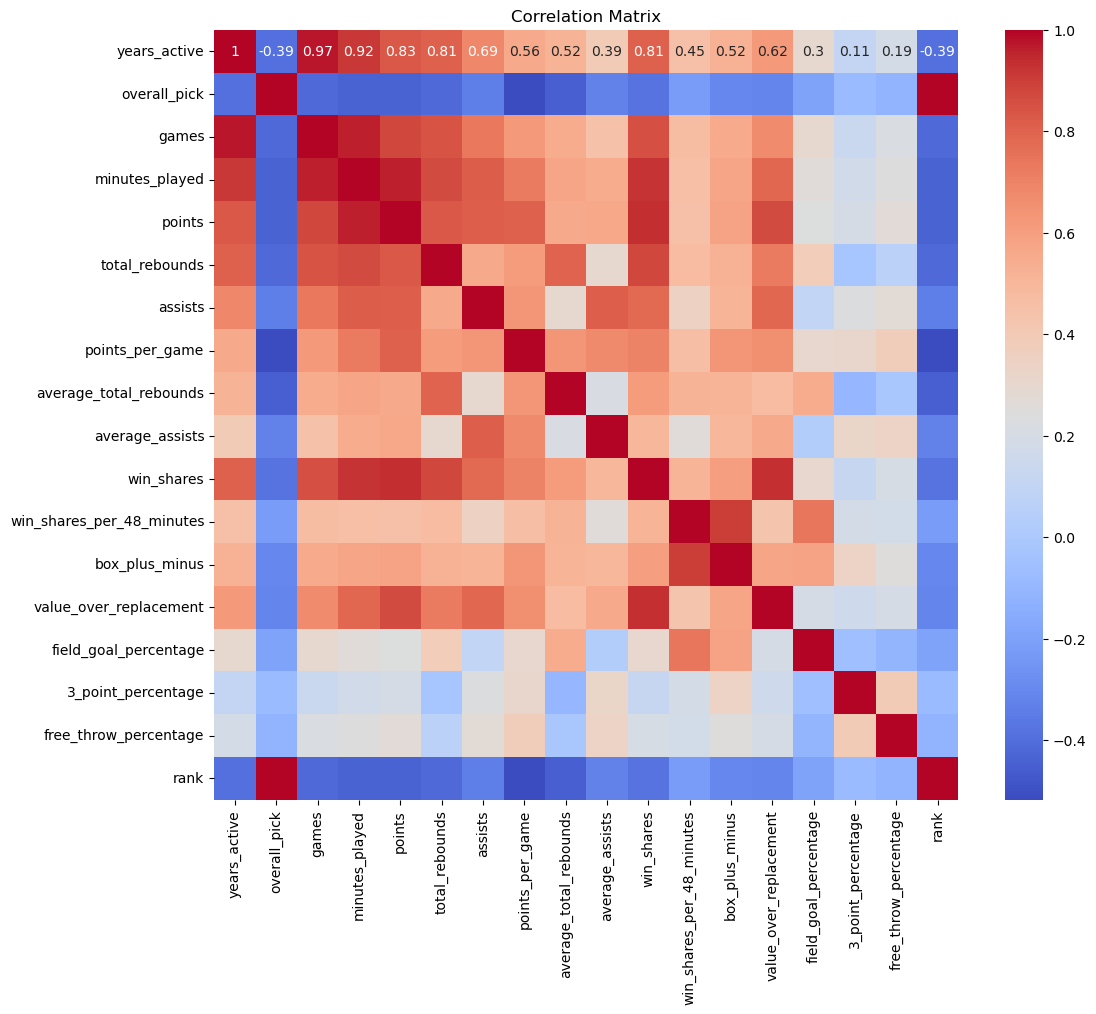

In [17]:
# Select the independent and dependent variables
X = nba_draft_data[relevant_columns].drop(columns=['years_active'])
y = nba_draft_data['years_active']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = nba_draft_data[relevant_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Calculating Variance Inflation Factors (VIF) to Detect Multicollinearity

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
X = nba_draft_data[relevant_columns].drop(columns=['years_active'])
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                      feature         VIF
0                       const  239.565719
1                overall_pick         inf
2                       games   24.961591
3              minutes_played   73.011214
4                      points   47.829147
5              total_rebounds   22.013521
6                     assists   17.327856
7             points_per_game   15.615536
8      average_total_rebounds    9.454397
9             average_assists    8.700687
10                 win_shares   53.480638
11  win_shares_per_48_minutes   13.208691
12             box_plus_minus   13.930842
13     value_over_replacement   27.406733
14      field_goal_percentage    3.222193
15         3_point_percentage    1.589456
16      free_throw_percentage    1.620110
17                       rank         inf


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


#Cleaning Data and Fitting the OLS Regression Model

In [19]:
# Remove rows with missing values in the selected columns
selected_columns = ['years_active', 'overall_pick', 'games', 'points_per_game', 'average_total_rebounds', 'average_assists',
                    'box_plus_minus', 'value_over_replacement', 'field_goal_percentage', '3_point_percentage', 
                    'free_throw_percentage']
nba_draft_data_reduced = nba_draft_data.dropna(subset=selected_columns)

# Select the independent and dependent variables
X = nba_draft_data_reduced[selected_columns].drop(columns=['years_active'])
y = nba_draft_data_reduced['years_active']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Recalculate VIF for the selected columns
vif_data_reduced = pd.DataFrame()
vif_data_reduced["feature"] = X.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data_reduced)

                            OLS Regression Results                            
Dep. Variable:           years_active   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     3034.
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        12:57:39   Log-Likelihood:                -2189.7
No. Observations:                1529   AIC:                             4401.
Df Residuals:                    1518   BIC:                             4460.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

#Standardizing Data, Performing PCA, and Fitting an OLS Regression Model

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Remove rows with missing values in the selected columns
selected_columns = ['years_active', 'games', 'points_per_game', 'average_total_rebounds', 'average_assists',
                    'box_plus_minus', 'value_over_replacement', 'field_goal_percentage', '3_point_percentage', 
                    'free_throw_percentage']
nba_draft_data_reduced = nba_draft_data.dropna(subset=selected_columns)

# Select the independent and dependent variables
X = nba_draft_data_reduced[selected_columns].drop(columns=['years_active'])
y = nba_draft_data_reduced['years_active']

# Standardize the predictors
X_standardized = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame for the principal components
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Reset index to ensure alignment
X_pca_df.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Add the constant term back
X_pca_df = sm.add_constant(X_pca_df)

# Fit the regression model using the principal components
model_pca = sm.OLS(y, X_pca_df).fit()

# Print the summary
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:           years_active   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     4183.
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        12:57:40   Log-Likelihood:                -2216.9
No. Observations:                1529   AIC:                             4450.
Df Residuals:                    1521   BIC:                             4493.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7286      0.026    254.407      0.0

#Displaying PCA components

In [21]:
# Get the PCA components
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the PCA components
print(pca_components)

        games  points_per_game  average_total_rebounds  average_assists  \
PC1  0.386238         0.437626                0.334559         0.341358   
PC2  0.072599        -0.065040                0.411774        -0.293943   
PC3 -0.251097        -0.093114               -0.059922        -0.248591   
PC4 -0.105222        -0.072309               -0.253411         0.334530   
PC5 -0.552282         0.211512               -0.045451         0.609108   
PC6  0.258054        -0.436128               -0.593331         0.070599   
PC7 -0.628920         0.007911                0.078606        -0.324570   

     box_plus_minus  value_over_replacement  field_goal_percentage  \
PC1        0.406956                0.390869               0.228907   
PC2        0.068405               -0.008463               0.484021   
PC3        0.367293               -0.371526               0.550908   
PC4        0.152854                0.182802              -0.033230   
PC5        0.086808               -0.251078      

#Visualizing PCA Results, Cross-Validation, and Residual Analysis

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


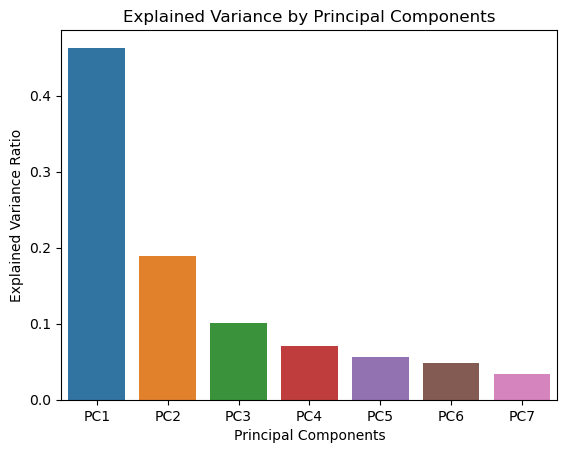

Cross-validated R-squared: 0.860028715167446


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


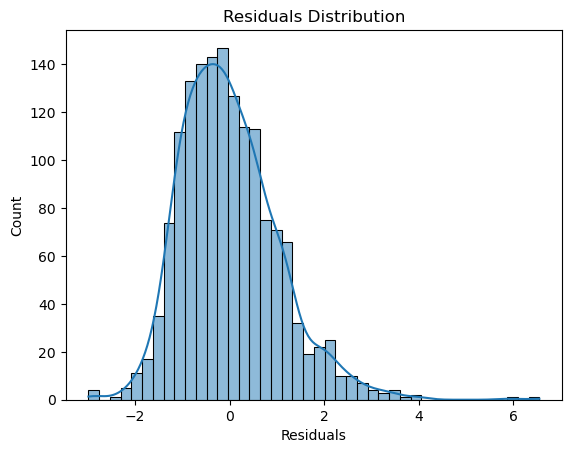

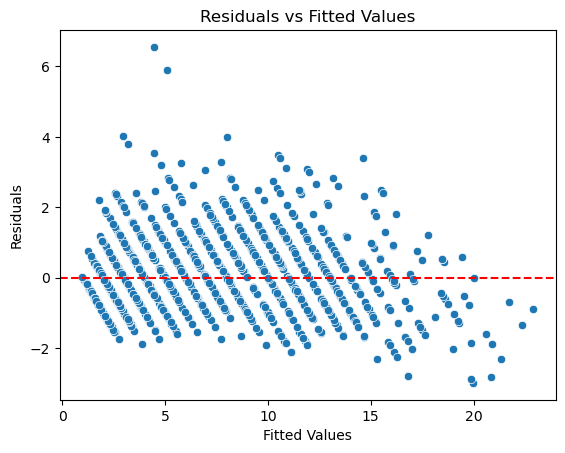

In [22]:
# Plot the explained variance ratio
explained_variance = pca.explained_variance_ratio_
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Cross-validate the PCA model
model = LinearRegression()
scores = cross_val_score(model, X_pca, y, cv=5)
print(f'Cross-validated R-squared: {scores.mean()}')

# Residual analysis
residuals = model_pca.resid
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

sns.scatterplot(x=model_pca.fittedvalues, y=residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

#Scatter plot for points per game vs. years active

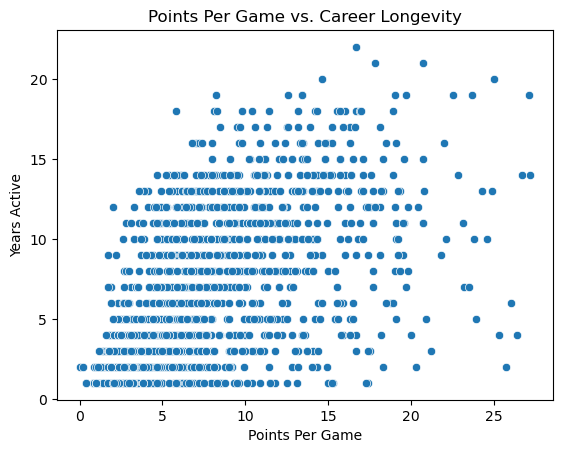

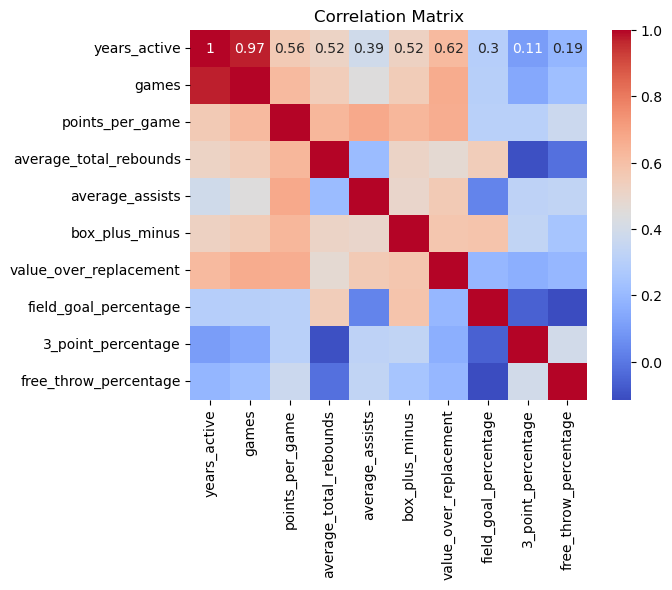

In [23]:
# Scatter plot for points per game vs. years active
sns.scatterplot(data=nba_draft_data, x='points_per_game', y='years_active')
plt.title('Points Per Game vs. Career Longevity')
plt.xlabel('Points Per Game')
plt.ylabel('Years Active')
plt.show()

# Heatmap for correlation matrix
corr_matrix = nba_draft_data[['years_active', 'games', 'points_per_game', 
                              'average_total_rebounds', 'average_assists', 
                              'box_plus_minus', 'value_over_replacement', 
                              'field_goal_percentage', '3_point_percentage', 
                              'free_throw_percentage']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Linear Regression Model

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into training and test sets
X = nba_draft_data[['games', 'points_per_game', 'average_total_rebounds', 
                    'average_assists', 'box_plus_minus', 'value_over_replacement', 
                    'field_goal_percentage', '3_point_percentage', 'free_throw_percentage']]
y = nba_draft_data['years_active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictors
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Predict on test set
y_pred = model.predict(X_test_pca)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Cross-validation
cv_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-cv_scores.mean()}')

Mean Squared Error: 0.9457133683347967
Cross-validated MSE: 1.114889217513488


In [25]:
# Fit model to entire dataset
model.fit(X_pca_df, y)

# Extract coefficients
coefficients = model.coef_

# Create a DataFrame to display coefficients
importance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(coefficients))],
    'Coefficient': coefficients
})

print(importance_df.sort_values(by='Coefficient', ascending=False))


  Principal Component  Coefficient
1                 PC2     1.670716
6                 PC7     1.381856
2                 PC3     0.439962
0                 PC1     0.000000
4                 PC5    -0.499669
3                 PC4    -1.099868
5                 PC6    -2.669683
7                 PC8    -3.035632


#Scenario Analysis for Career Longevity Prediction

In [26]:
# Create a DataFrame for scenario analysis
scenarios = pd.DataFrame({
    'games': [50, 70, 90],
    'points_per_game': [10, 15, 20],
    'average_total_rebounds': [5, 7, 10],
    'average_assists': [2, 5, 7],
    'box_plus_minus': [0, 5, 10],
    'value_over_replacement': [0.5, 1, 1.5],
    'field_goal_percentage': [0.45, 0.5, 0.55],
    '3_point_percentage': [0.35, 0.4, 0.45],
    'free_throw_percentage': [0.75, 0.8, 0.85]
})

# Standardize the scenario data
scenarios_scaled = scaler.transform(scenarios)

# Apply PCA transformation
scenarios_pca = pca.transform(scenarios_scaled)

# Predict career longevity for each scenario
scenarios_pca_df = pd.DataFrame(scenarios_pca, columns=[f'PC{i+1}' for i in range(scenarios_pca.shape[1])])
scenarios_pca_df = sm.add_constant(scenarios_pca_df)
scenarios['predicted_years_active'] = model_pca.predict(scenarios_pca_df)

print(scenarios)


   games  points_per_game  average_total_rebounds  average_assists  \
0     50               10                       5                2   
1     70               15                       7                5   
2     90               20                      10                7   

   box_plus_minus  value_over_replacement  field_goal_percentage  \
0               0                     0.5                   0.45   
1               5                     1.0                   0.50   
2              10                     1.5                   0.55   

   3_point_percentage  free_throw_percentage  predicted_years_active  
0                0.35                   0.75                1.778380  
1                0.40                   0.80                1.970082  
2                0.45                   0.85                2.072749  


#Data Preparation for Clustering Analysis

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Select the relevant features for clustering
features = ['games', 'points_per_game', 'average_total_rebounds', 'average_assists',
            'box_plus_minus', 'value_over_replacement', 'field_goal_percentage',
            '3_point_percentage', 'free_throw_percentage']

X = nba_draft_data[features]

# Handle missing values by imputing the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # First fit, then transform

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

#Clustering Analysis

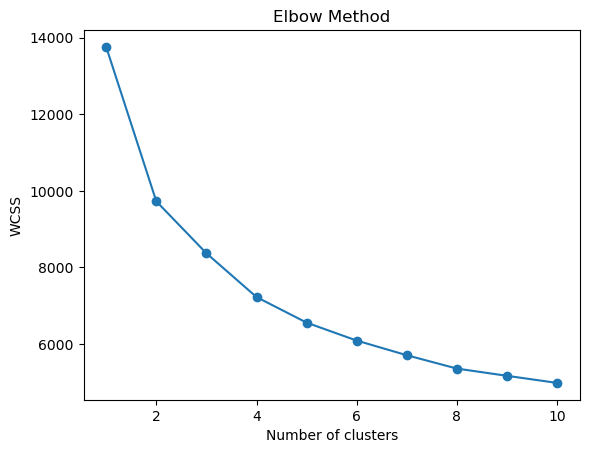

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

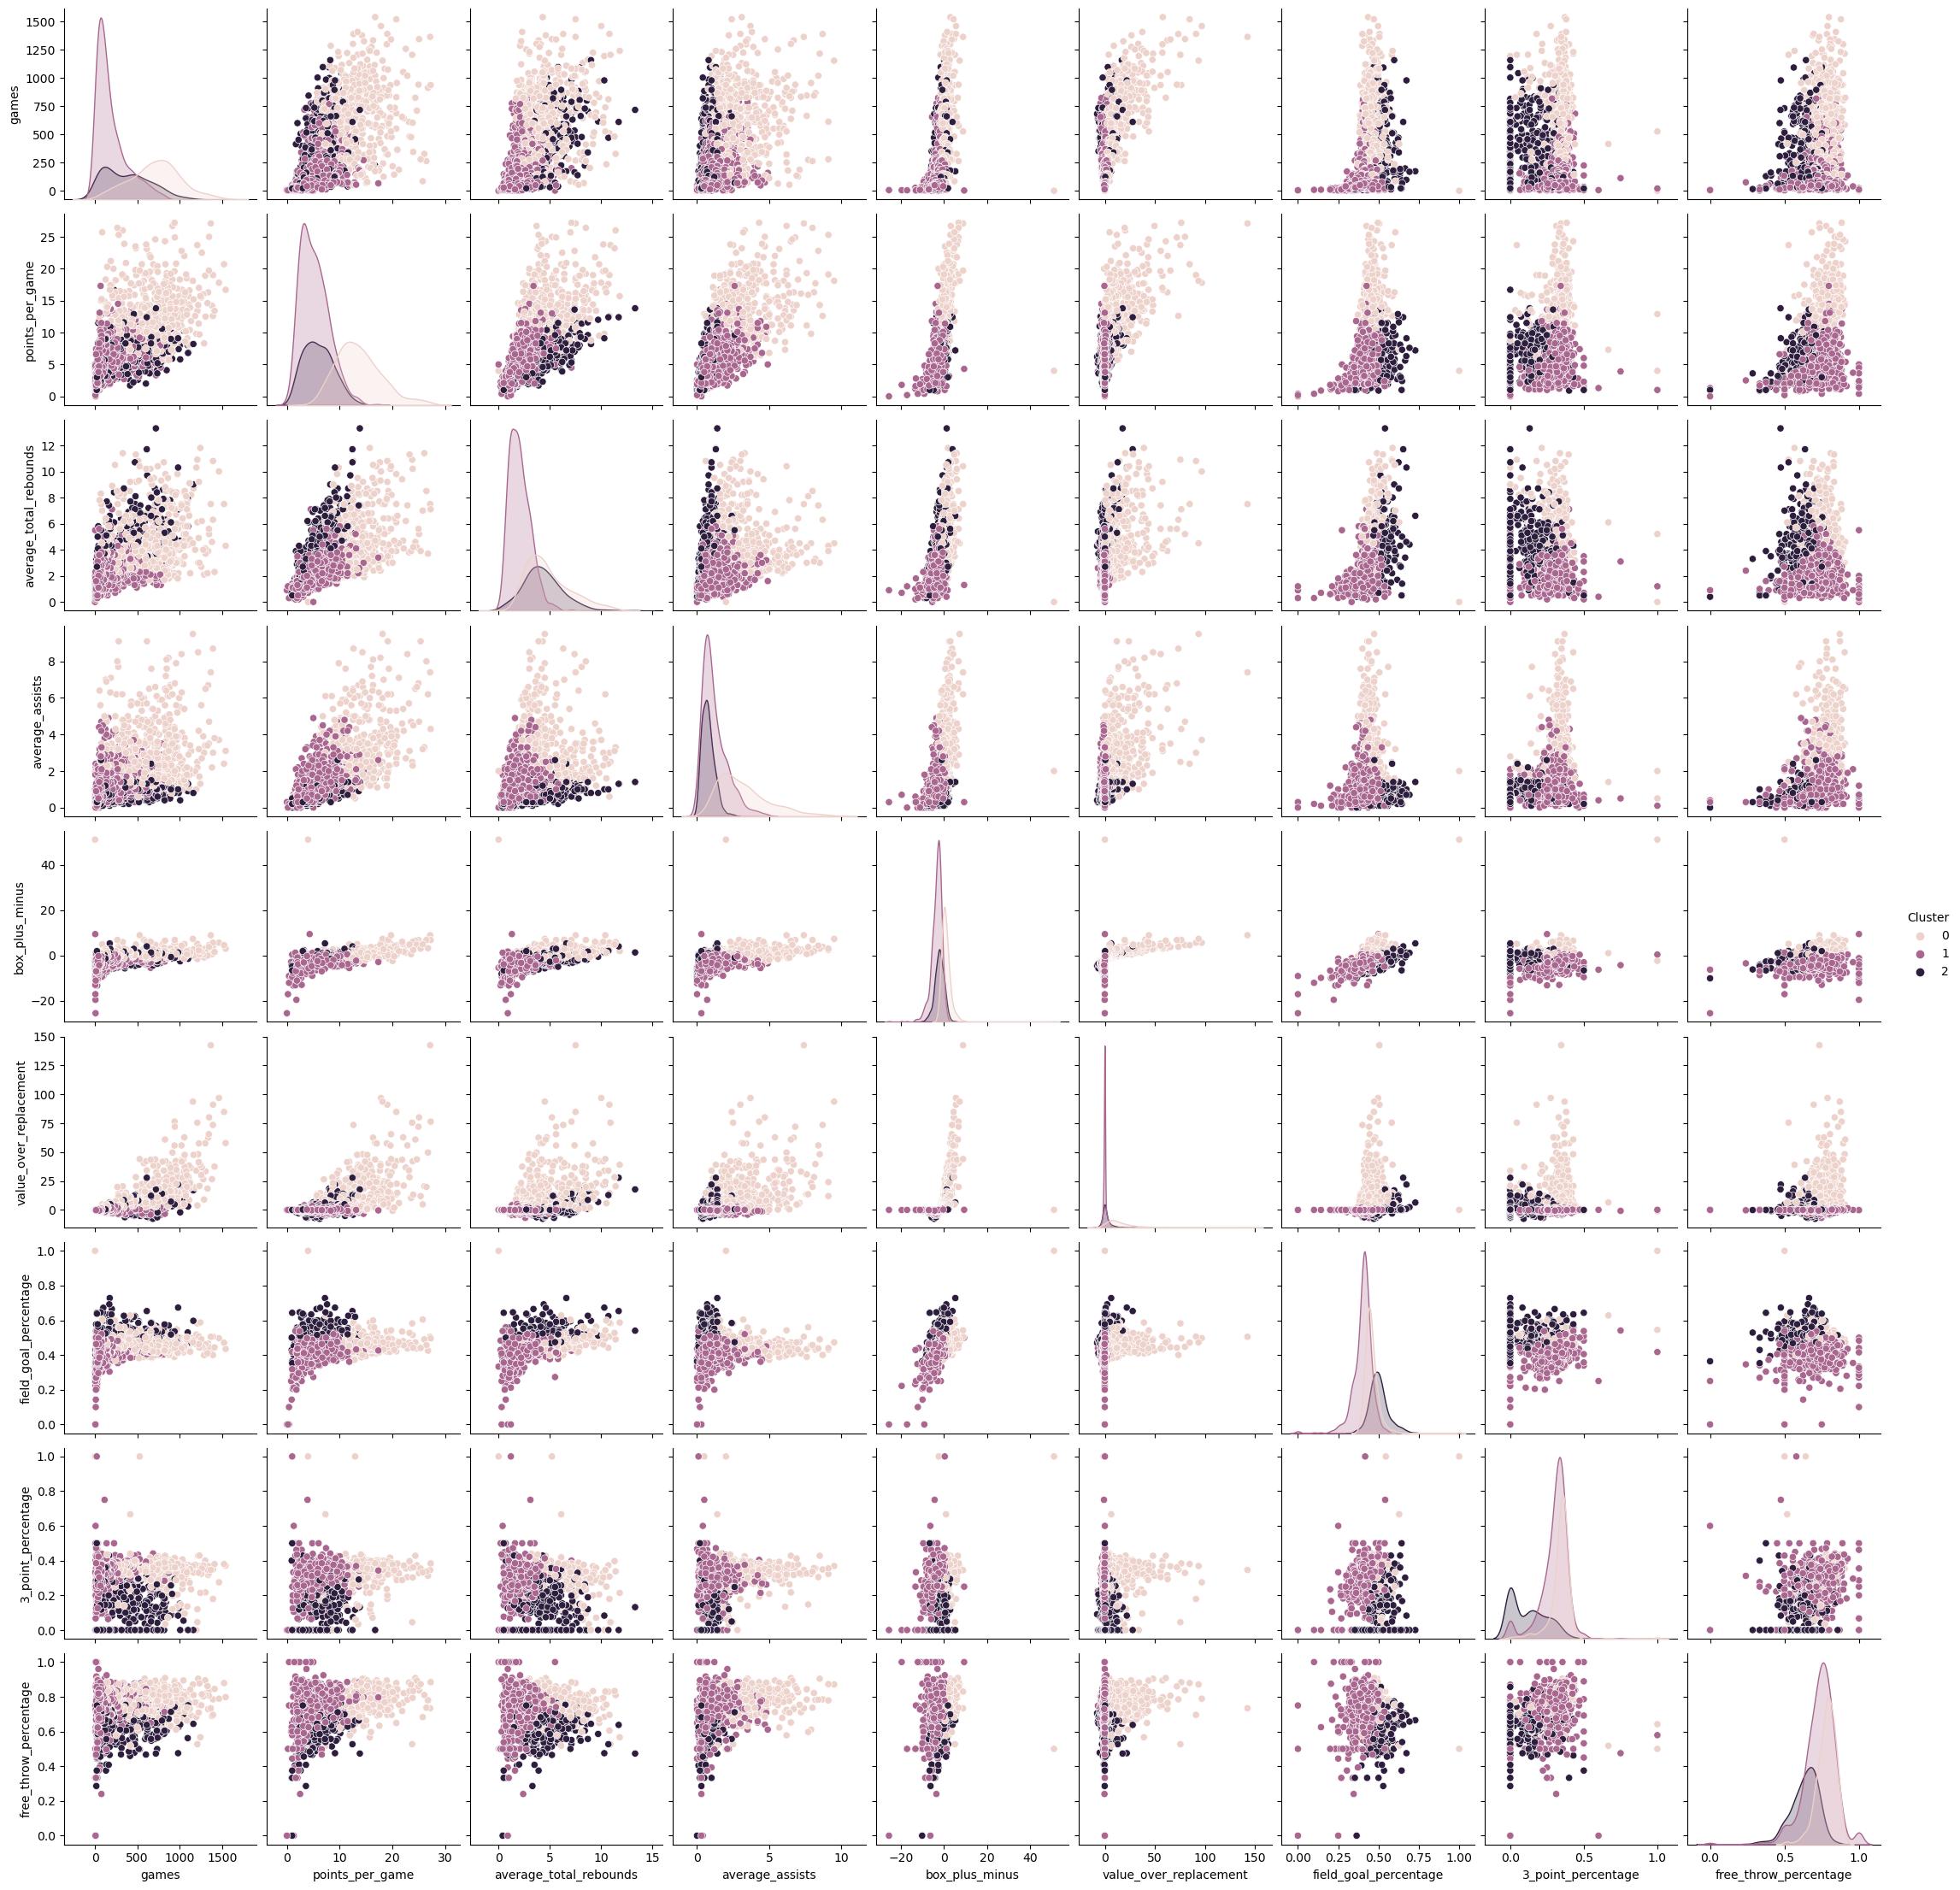

                  id         year       rank  overall_pick  years_active  \
Cluster                                                                    
0         895.244186  2004.430233  16.137209     16.137209     11.123256   
1        1067.408322  2007.085826  31.016905     31.016905      4.144343   
2         858.378788  2003.609091  26.212121     26.212121      7.024242   

              games  minutes_played       points  total_rebounds      assists  \
Cluster                                                                         
0        710.846512    20727.609302  9664.900000     3468.244186  2267.165116   
1        187.919376     3320.695709  1211.101430      450.392718   270.036411   
2        374.190909     7438.466667  2595.618182     1925.230303   324.224242   

         ...  free_throw_percentage  average_minutes_played  points_per_game  \
Cluster  ...                                                                   
0        ...               0.781119               28.

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=3)  # Set n_init explicitly to 3
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow Method, choose an appropriate number of clusters 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=3)  # Set n_init explicitly to 3
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
nba_draft_data['Cluster'] = clusters

# Visualize clusters
sns.pairplot(nba_draft_data, hue='Cluster', vars=features)
plt.show()

# Summarize cluster characteristics, selecting only numeric columns
numeric_columns = nba_draft_data.select_dtypes(include=['number']).columns
cluster_summary = nba_draft_data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)

#Random Forest Classifier for Predicting Player Clusters

In [29]:
# Define the features and the target variable
X = nba_draft_data[features]
y = nba_draft_data['Cluster']  # Ensure the 'Cluster' column is already created in the cleaned data

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.DataFrame(clf.feature_importances_, index=features, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

[[ 87   2   0]
 [  0 138   2]
 [  3  11  63]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.91      0.99      0.95       140
           2       0.97      0.82      0.89        77

    accuracy                           0.94       306
   macro avg       0.95      0.93      0.94       306
weighted avg       0.94      0.94      0.94       306

                        importance
points_per_game           0.196383
field_goal_percentage     0.152552
value_over_replacement    0.151438
3_point_percentage        0.115946
average_total_rebounds    0.111296
games                     0.082795
box_plus_minus            0.064631
free_throw_percentage     0.064454
average_assists           0.060504


#Plotting Feature Importance for Random Forest Classifier

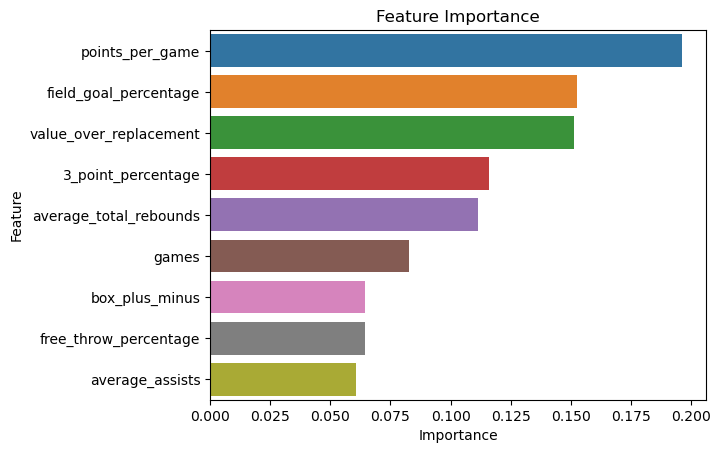

In [30]:
# Plot feature importance
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#Clustering Players. Added in player names, draft year and their team

In [31]:
import numpy as np
# Include player names, draft year, and team
features_with_info = ['player', 'year', 'team', 'games', 'points_per_game', 
                      'average_total_rebounds', 'average_assists', 'box_plus_minus', 
                      'value_over_replacement', 'field_goal_percentage', 
                      '3_point_percentage', 'free_throw_percentage']

X_info = nba_draft_data[features_with_info].copy()

# Convert infinite values to NaN
X_info.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
X_info.dropna(inplace=True)

# Select features for clustering
features = ['games', 'points_per_game', 'average_total_rebounds', 'average_assists',
            'box_plus_minus', 'value_over_replacement', 'field_goal_percentage',
            '3_point_percentage', 'free_throw_percentage']

X = X_info[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
X_info['Cluster'] = clusters

# Summarize cluster characteristics (numeric features only)
numeric_columns = X_info.select_dtypes(include=[np.number]).columns
cluster_summary = X_info.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)


                year       games  points_per_game  average_total_rebounds  \
Cluster                                                                     
0        2007.001289  187.511598         5.173454                2.038015   
1        2004.289157  718.491566        13.700241                4.750361   
2        2003.940828  384.538462         6.274852                4.507988   

         average_assists  box_plus_minus  value_over_replacement  \
Cluster                                                            
0               1.200644       -3.488273               -0.117010   
1               3.240723        0.969398               16.810602   
2               0.805917       -1.965089                1.423669   

         field_goal_percentage  3_point_percentage  free_throw_percentage  \
Cluster                                                                     
0                     0.400567            0.298674               0.733272   
1                     0.453402            

#Plot Pair Plot with Player Information

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

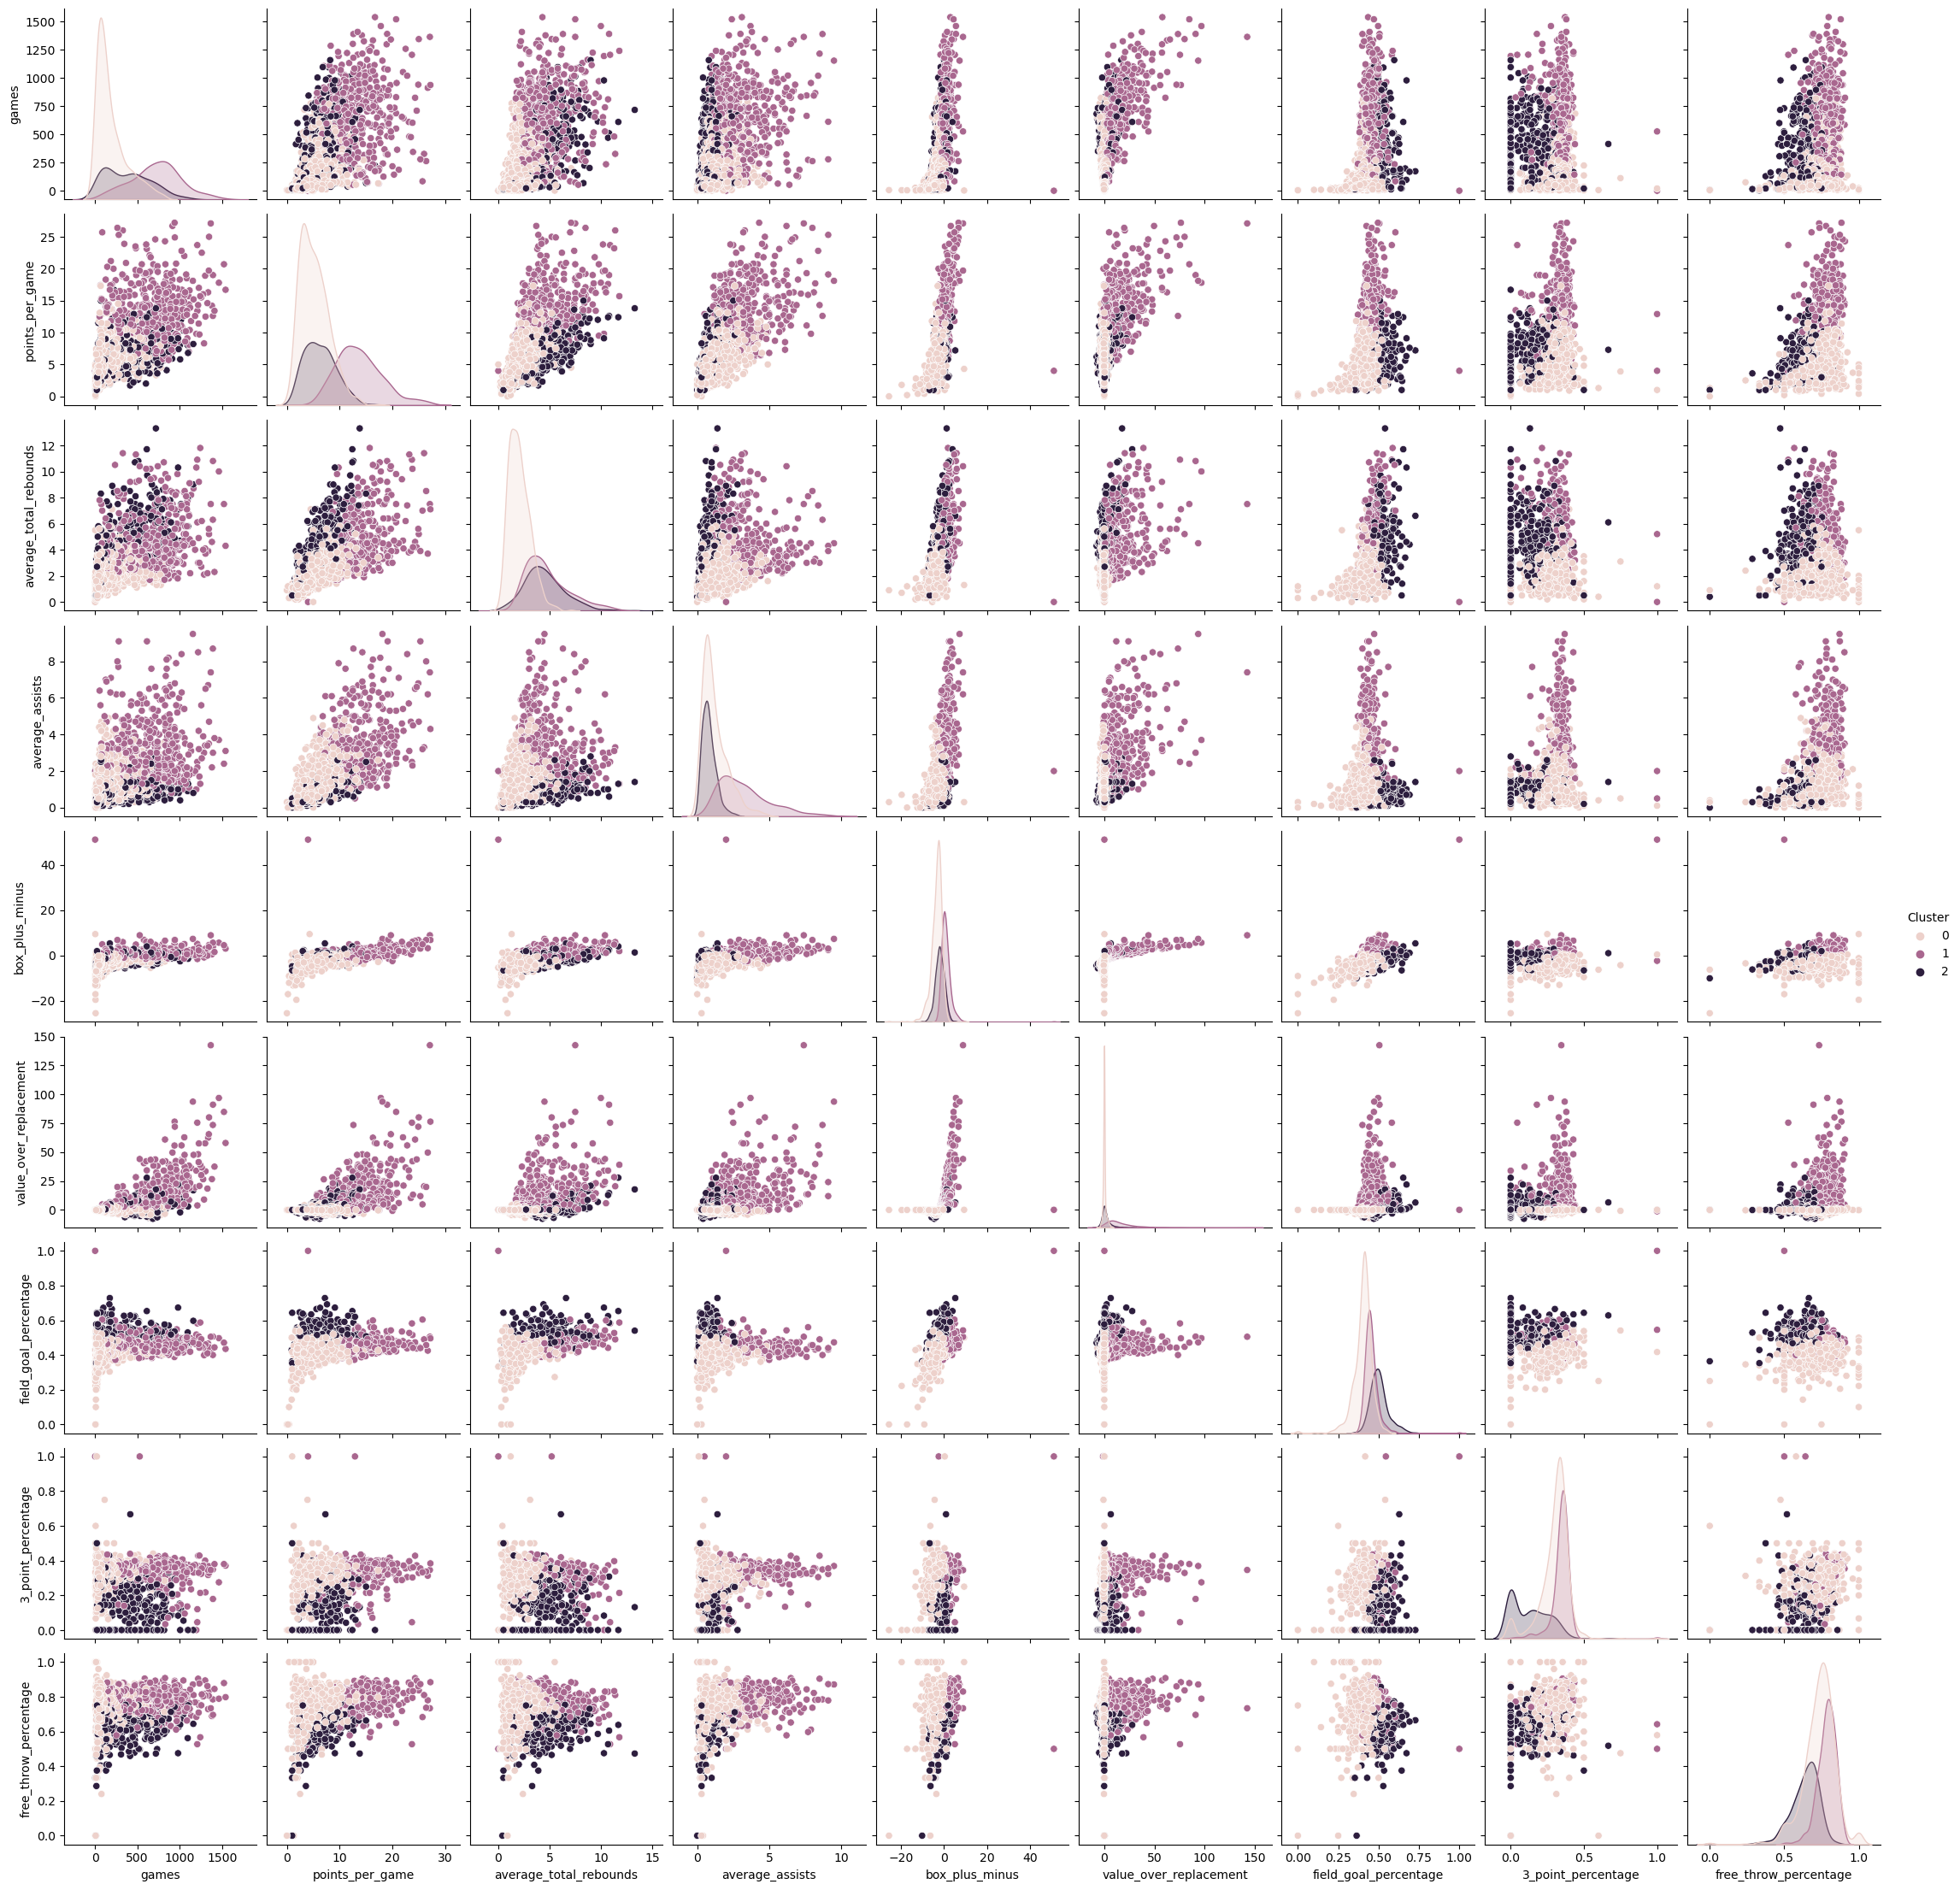

In [32]:
sns.pairplot(X_info, hue='Cluster', vars=features)
plt.show()

#Visualize performance trends for draft classes between 2018-2022

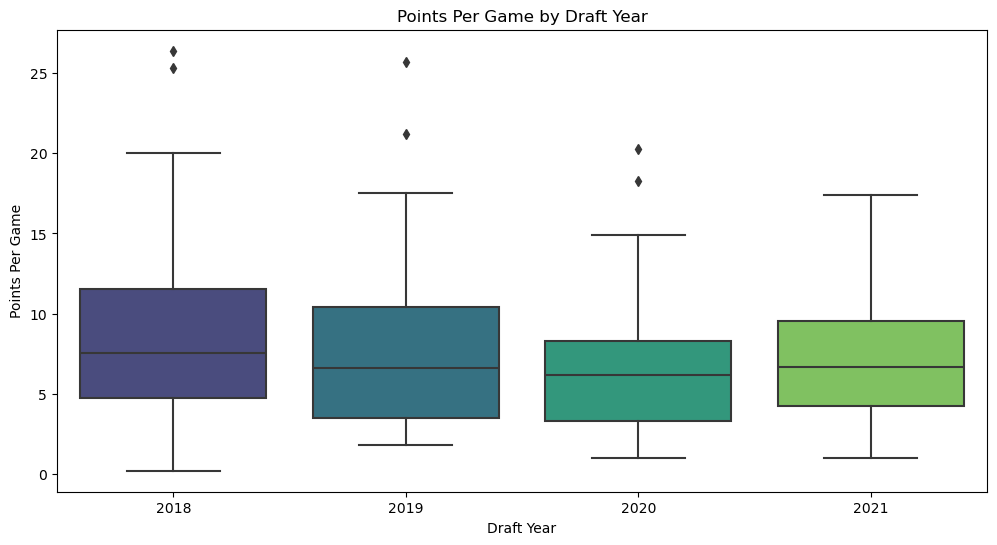

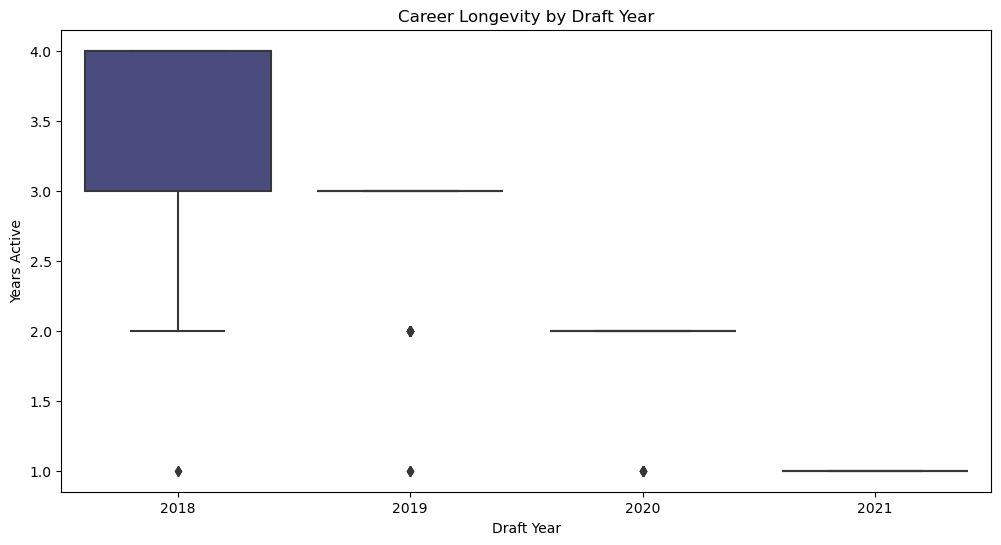

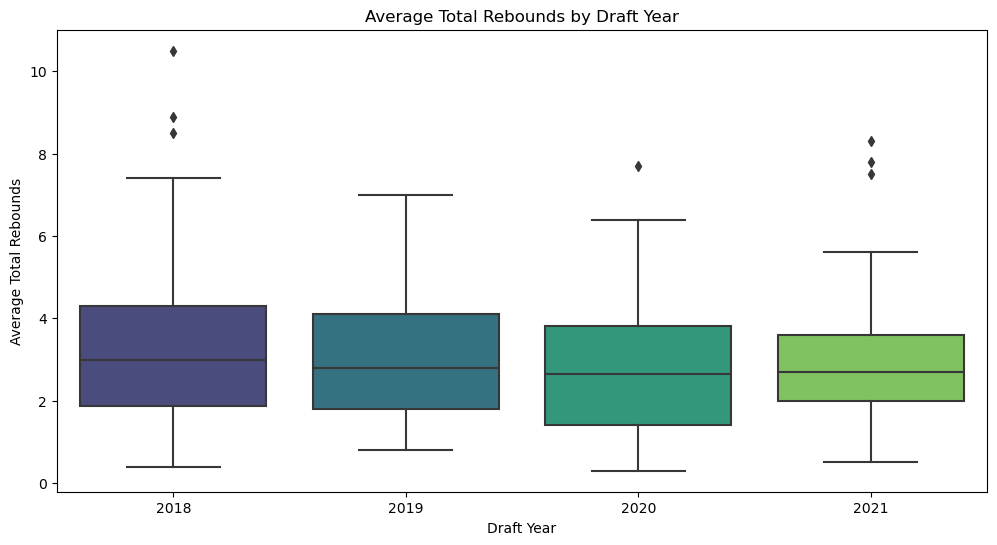

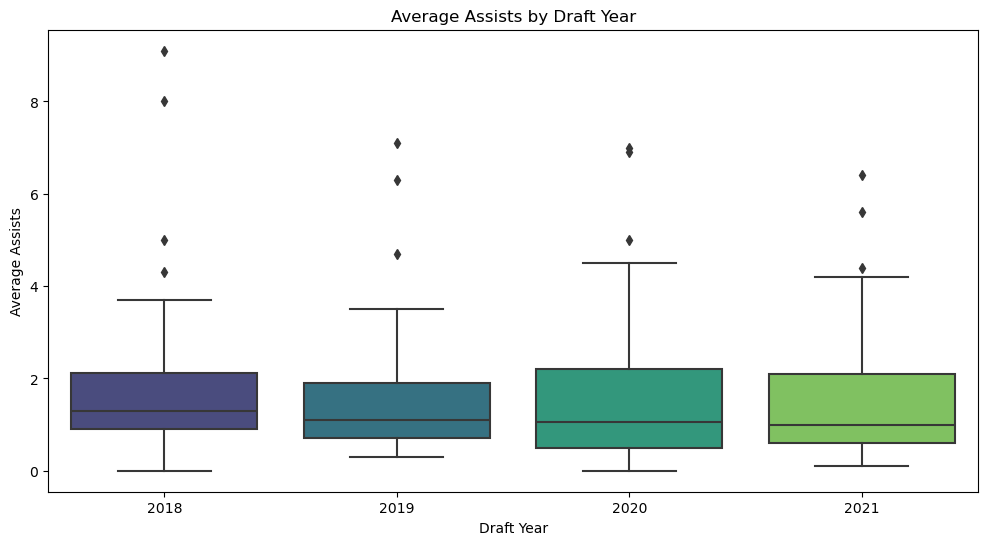

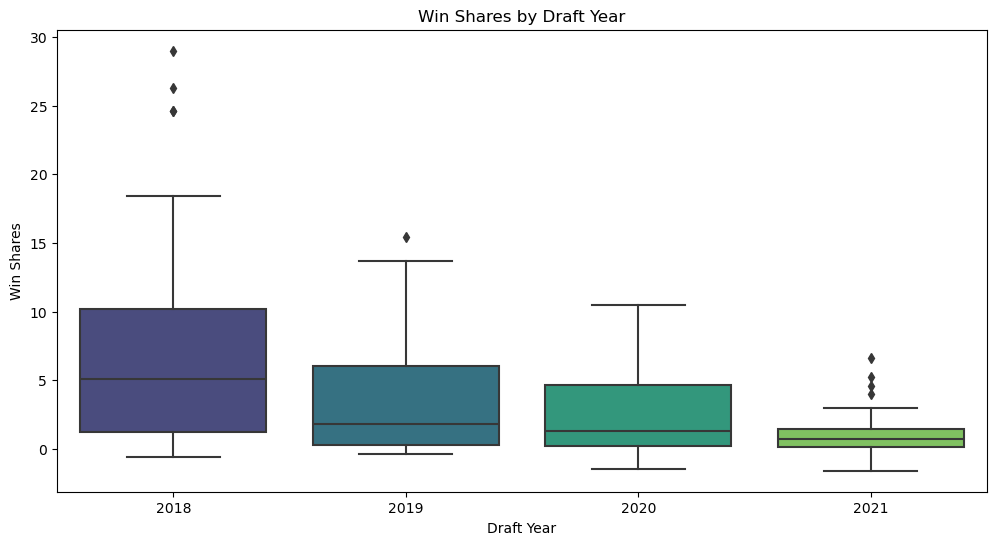

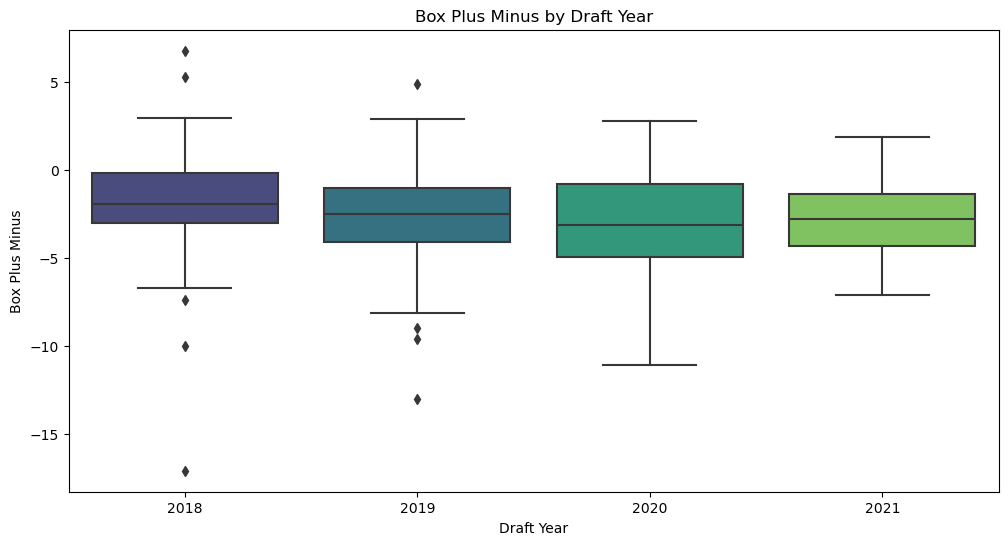

In [33]:
# Filter for recent draft classes (e.g., 2018-2022)
recent_years = nba_draft_data[nba_draft_data['year'] >= 2018]

# Ensure the 'Cluster' column exists and is not causing issues
if 'Cluster' not in recent_years.columns:
    # If the column doesn't exist, assign a default value or cluster the data if needed
    recent_years['Cluster'] = 0

# Function to visualize performance trends for different draft classes
def visualize_performance_trends(data, metric, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='year', y=metric, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Points Per Game comparison
visualize_performance_trends(recent_years, 'points_per_game', 'Points Per Game by Draft Year', 'Draft Year', 'Points Per Game')

# Career Longevity comparison
visualize_performance_trends(recent_years, 'years_active', 'Career Longevity by Draft Year', 'Draft Year', 'Years Active')

# Average Total Rebounds comparison
visualize_performance_trends(recent_years, 'average_total_rebounds', 'Average Total Rebounds by Draft Year', 'Draft Year', 'Average Total Rebounds')

# Average Assists comparison
visualize_performance_trends(recent_years, 'average_assists', 'Average Assists by Draft Year', 'Draft Year', 'Average Assists')

# Win Shares comparison
visualize_performance_trends(recent_years, 'win_shares', 'Win Shares by Draft Year', 'Draft Year', 'Win Shares')

# Box Plus Minus comparison
visualize_performance_trends(recent_years, 'box_plus_minus', 'Box Plus Minus by Draft Year', 'Draft Year', 'Box Plus Minus')

#Filter for Players from UNC

In [34]:
# Filter for players from UNC
unc_players = nba_draft_data[nba_draft_data['college'] == 'UNC']

# Display the result
print(unc_players)

        id  year  rank  overall_pick team             player college  \
4        5  1989     5             5  CHH          J.R. Reid     UNC   
131    132  1991    24            24  BOS           Rick Fox     UNC   
134    135  1991    27            27  SAC      Pete Chilcutt     UNC   
181    182  1992    20            20  NYK       Hubert Davis     UNC   
227    228  1993    12            12  LAL       George Lynch     UNC   
278    279  1994     9             9  BOS      Eric Montross     UNC   
326    327  1995     3             3  PHI   Jerry Stackhouse     UNC   
327    328  1995     4             4  WSB    Rasheed Wallace     UNC   
418    419  1996    37            37  DEN       Jeff McInnis     UNC   
500    501  1998     4             4  TOR     Antawn Jamison     UNC   
501    502  1998     5             5  GSW       Vince Carter     UNC   
530    531  1998    34            34  CHI  Shammond Williams     UNC   
690    691  2001    20            20  CLE    Brendan Haywood    

#Years Active for UNC Drafted Players

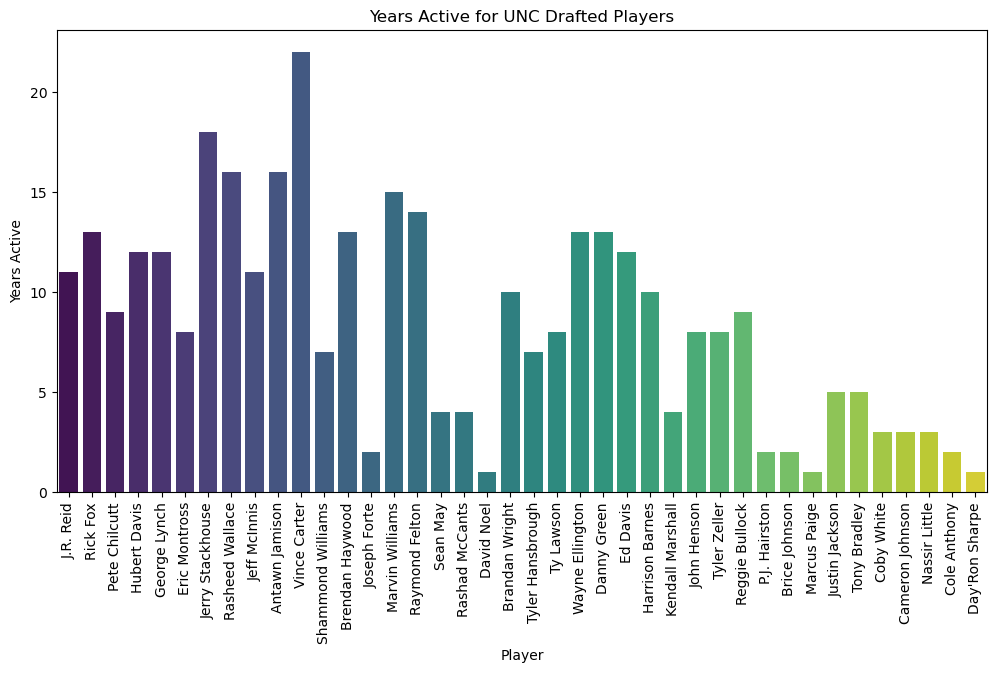

In [35]:
# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=unc_players, x='player', y='years_active', palette='viridis')

# Set plot title and labels
plt.title('Years Active for UNC Drafted Players')
plt.xlabel('Player')
plt.ylabel('Years Active')
plt.xticks(rotation=90)  # Rotate the x labels for better readability

# Show the plot
plt.show()

#Years Active vs Points Per Game for UNC Drafted Players

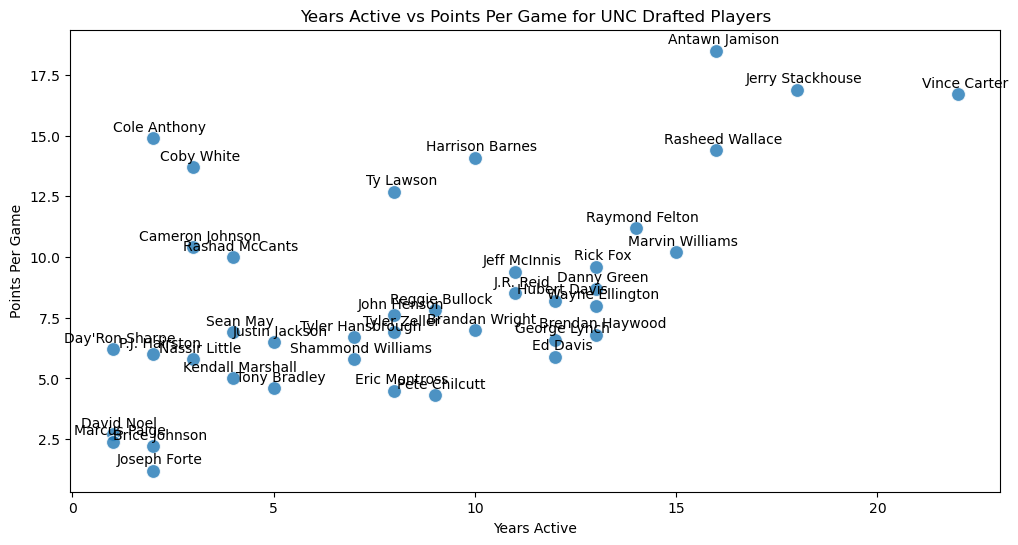

In [36]:
# Filter for players from UNC
unc_players = nba_draft_data[nba_draft_data['college'] == 'UNC']

# Create a scatter plot
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=unc_players, x='years_active', y='points_per_game', s=100, alpha=0.8)

# Annotate each point with the player's name
for i in range(unc_players.shape[0]):
    plt.annotate(unc_players['player'].iloc[i], 
                 (unc_players['years_active'].iloc[i], unc_players['points_per_game'].iloc[i]),
                 textcoords="offset points", xytext=(5,5), ha='center')

# Set plot title and labels
plt.title('Years Active vs Points Per Game for UNC Drafted Players')
plt.xlabel('Years Active')
plt.ylabel('Points Per Game')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


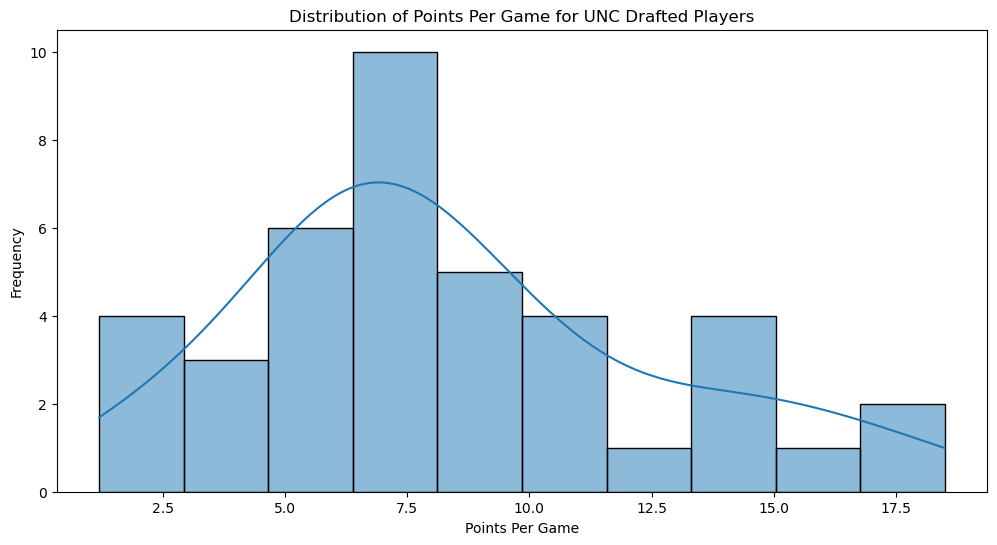

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(unc_players['points_per_game'], bins=10, kde=True)
plt.title('Distribution of Points Per Game for UNC Drafted Players')
plt.xlabel('Points Per Game')
plt.ylabel('Frequency')
plt.show()


#Years Active by Draft Year for UNC Drafted Players

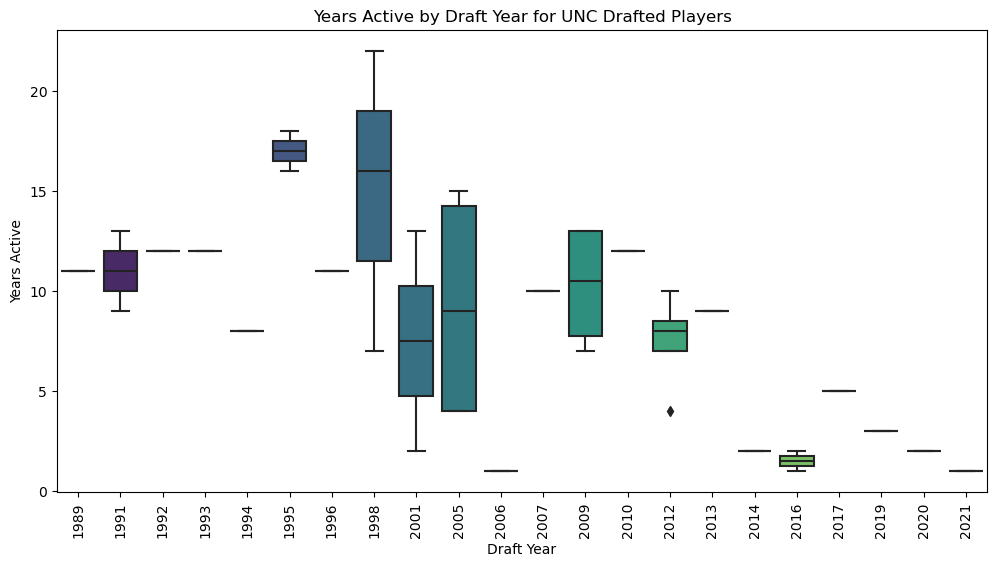

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=unc_players, x='year', y='years_active', palette='viridis')
plt.title('Years Active by Draft Year for UNC Drafted Players')
plt.xlabel('Draft Year')
plt.ylabel('Years Active')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


#Points Per Game by Draft Year for UNC Drafted Players

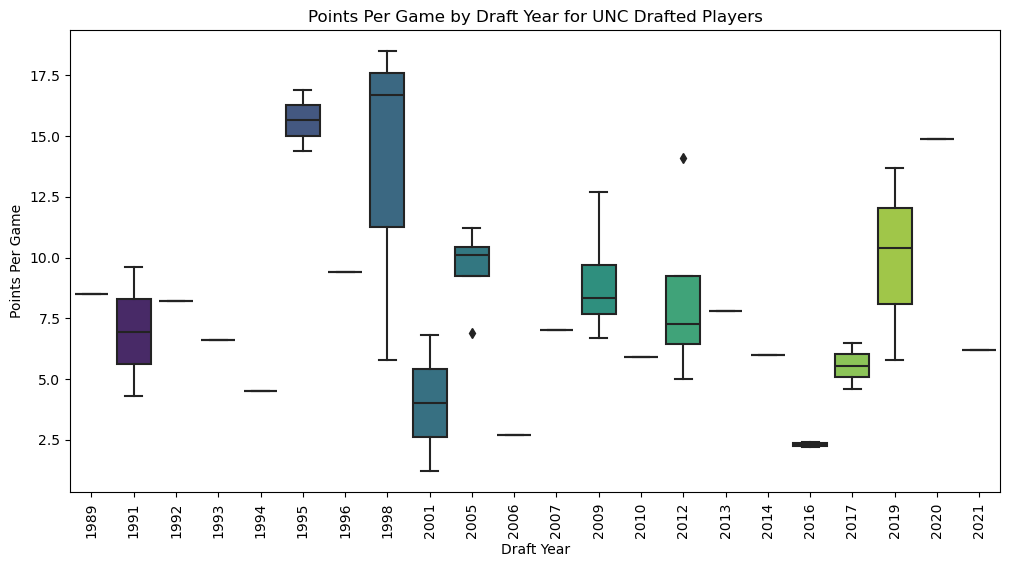

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=unc_players, x='year', y='points_per_game', palette='viridis')
plt.title('Points Per Game by Draft Year for UNC Drafted Players')
plt.xlabel('Draft Year')
plt.ylabel('Points Per Game')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


#Correlation Matrix of Performance Metrics for UNC Drafted Players

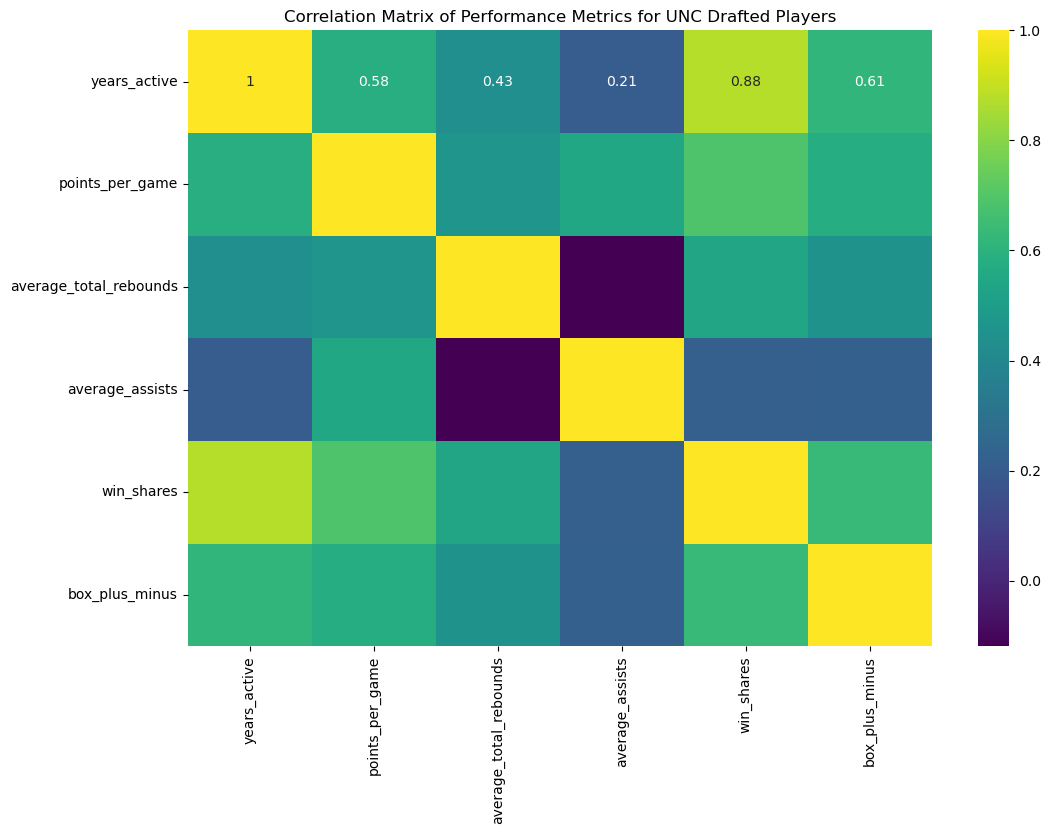

In [40]:
plt.figure(figsize=(12, 8))
correlation_matrix = unc_players[['years_active', 'points_per_game', 'average_total_rebounds', 'average_assists', 'win_shares', 'box_plus_minus']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Performance Metrics for UNC Drafted Players')
plt.show()


#Teams with the Most Top 3 Picks since 1989

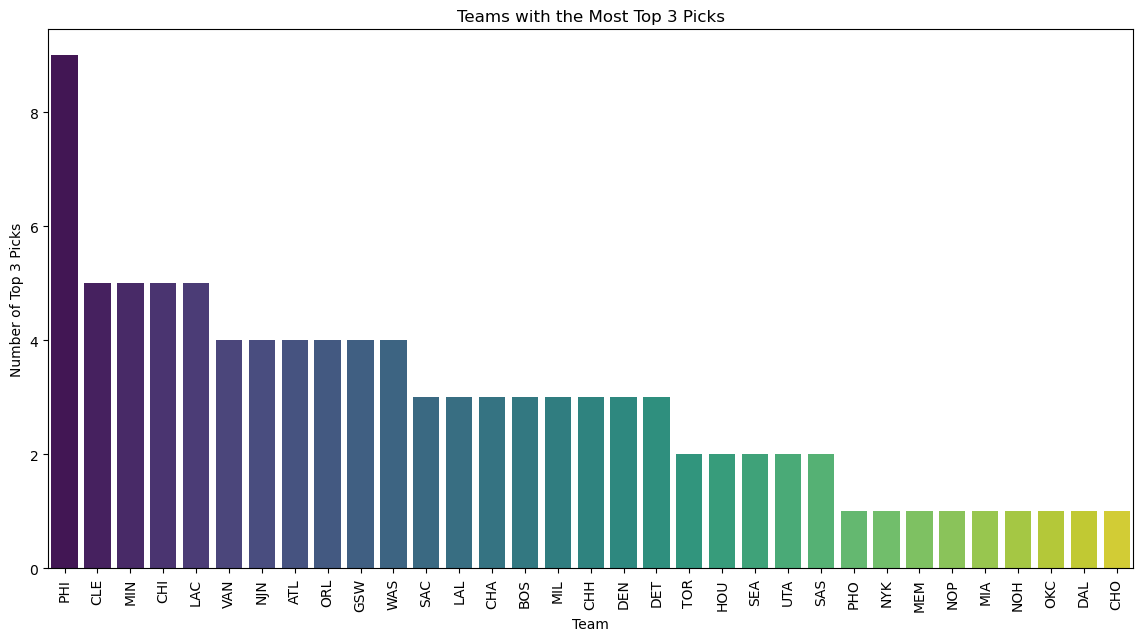

In [41]:
# Filter for top 3 picks
top_3_picks = nba_draft_data[nba_draft_data['rank'] <= 3]

# Count the occurrences for each team
top_3_picks_counts = top_3_picks['team'].value_counts()

# Convert to a DataFrame for easier plotting
top_3_picks_counts_df = top_3_picks_counts.reset_index()
top_3_picks_counts_df.columns = ['team', 'top_3_picks_count']

# Plot the results
plt.figure(figsize=(14, 7))
sns.barplot(data=top_3_picks_counts_df, x='team', y='top_3_picks_count', palette='viridis')
plt.title('Teams with the Most Top 3 Picks')
plt.xlabel('Team')
plt.ylabel('Number of Top 3 Picks')
plt.xticks(rotation=90)
plt.show()


In [42]:
top_3_picks = nba_draft_data[nba_draft_data['overall_pick'] <= 3]

#Average performance metrics for top 3 picks

In [43]:
# Calculate the average performance metrics for top 3 picks
top_3_metrics = top_3_picks[['points_per_game', 'years_active', 'win_shares', 'box_plus_minus']].mean()
print("Average Performance Metrics for Top 3 Picks:")
print(top_3_metrics)

Average Performance Metrics for Top 3 Picks:
points_per_game    15.500000
years_active       10.479167
win_shares         55.115625
box_plus_minus      1.026042
dtype: float64


#Average performance metrics for non-top 3 picks

In [44]:
# Calculate the average performance metrics for non-top 3 picks
non_top_3_picks = nba_draft_data[nba_draft_data['overall_pick'] > 3]
non_top_3_metrics = non_top_3_picks[['points_per_game', 'years_active', 'win_shares', 'box_plus_minus']].mean()
print("Average Performance Metrics for Non-Top 3 Picks:")
print(non_top_3_metrics)

Average Performance Metrics for Non-Top 3 Picks:
points_per_game     7.210816
years_active        6.477320
win_shares         17.003280
box_plus_minus     -2.140475
dtype: float64


#Comparison of Performance Metrics: Top 3 Picks vs Non-Top 3 Picks

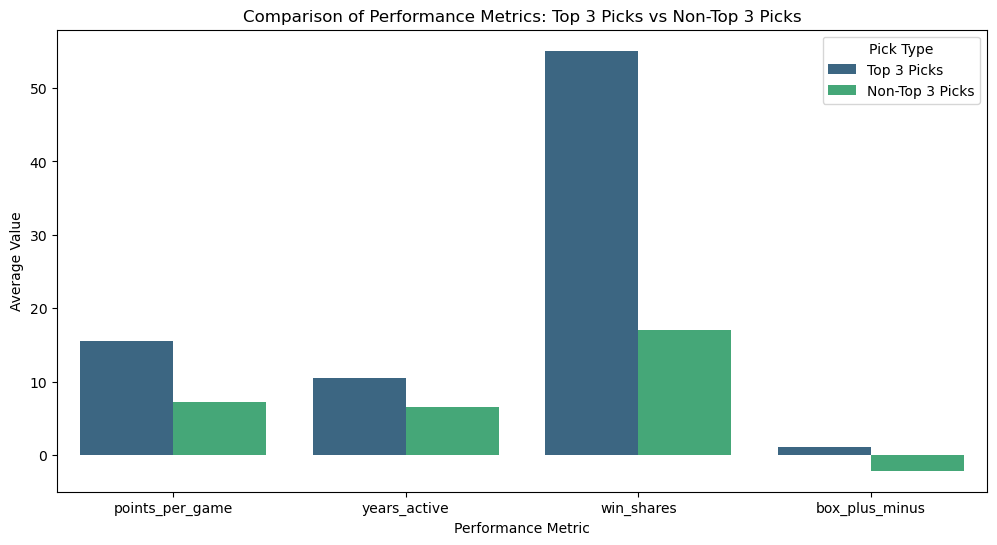

In [45]:
# Combine the metrics into a single DataFrame for plotting
metrics_df = pd.DataFrame({
    'Top 3 Picks': top_3_metrics,
    'Non-Top 3 Picks': non_top_3_metrics
}).reset_index().melt(id_vars='index', var_name='Pick Type', value_name='Metric Value')

# Plot the comparison of performance metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df, x='index', y='Metric Value', hue='Pick Type', palette='viridis')
plt.title('Comparison of Performance Metrics: Top 3 Picks vs Non-Top 3 Picks')
plt.xlabel('Performance Metric')
plt.ylabel('Average Value')
plt.legend(title='Pick Type')
plt.show()


#Performance metrics

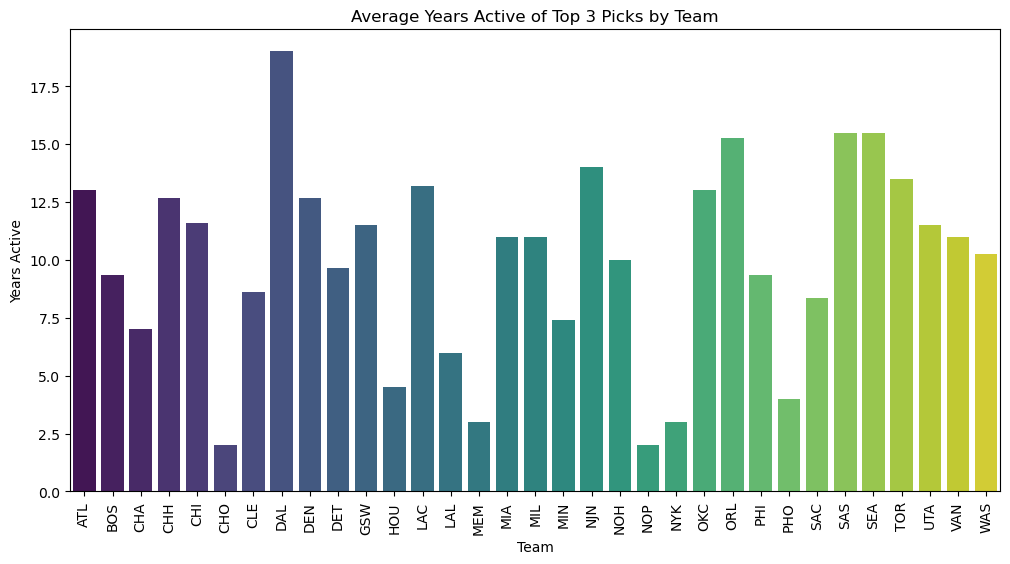

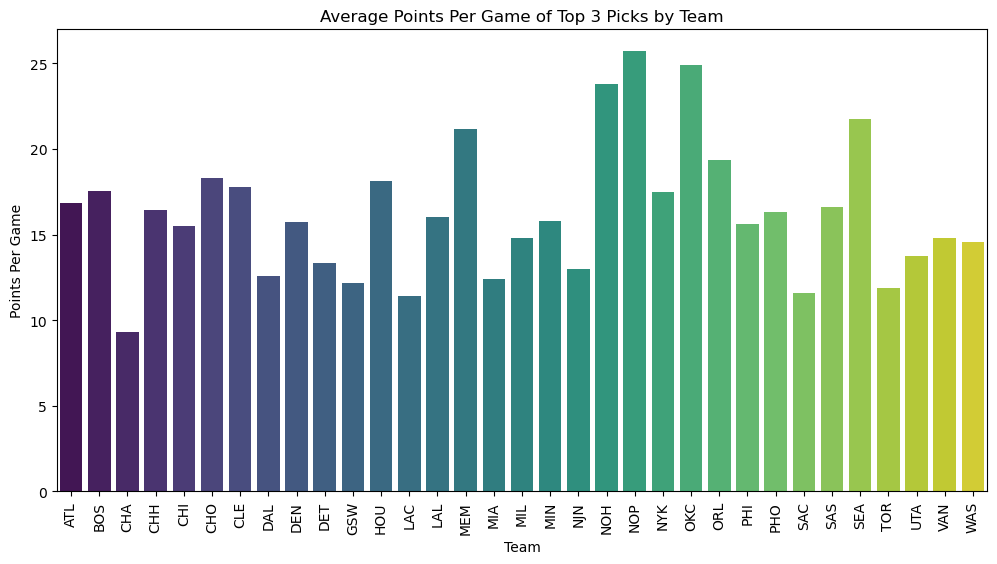

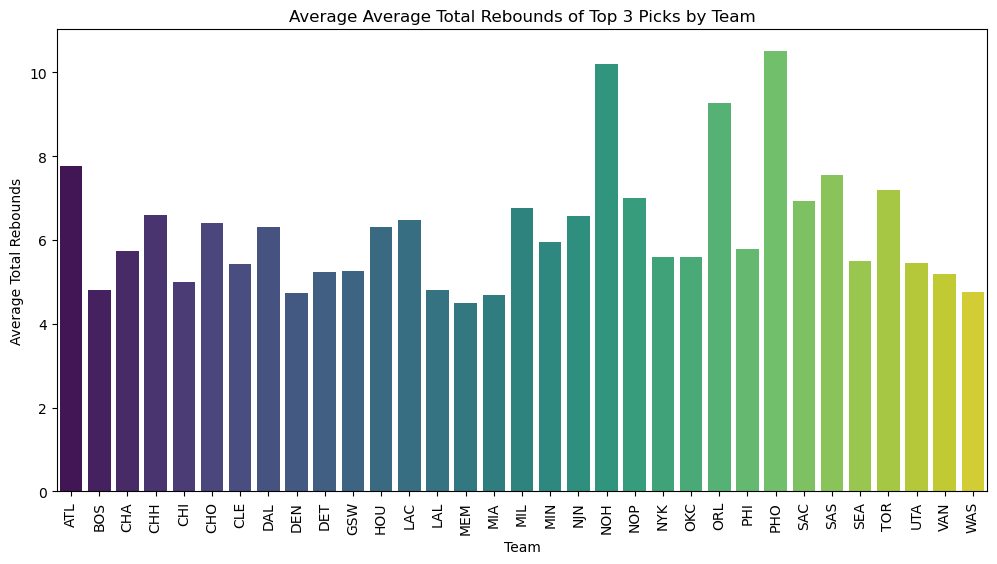

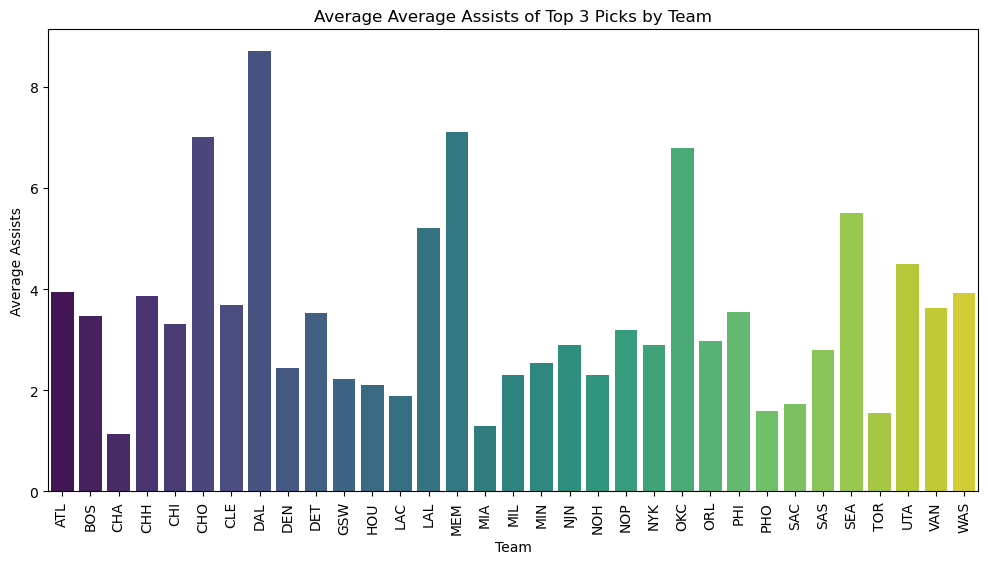

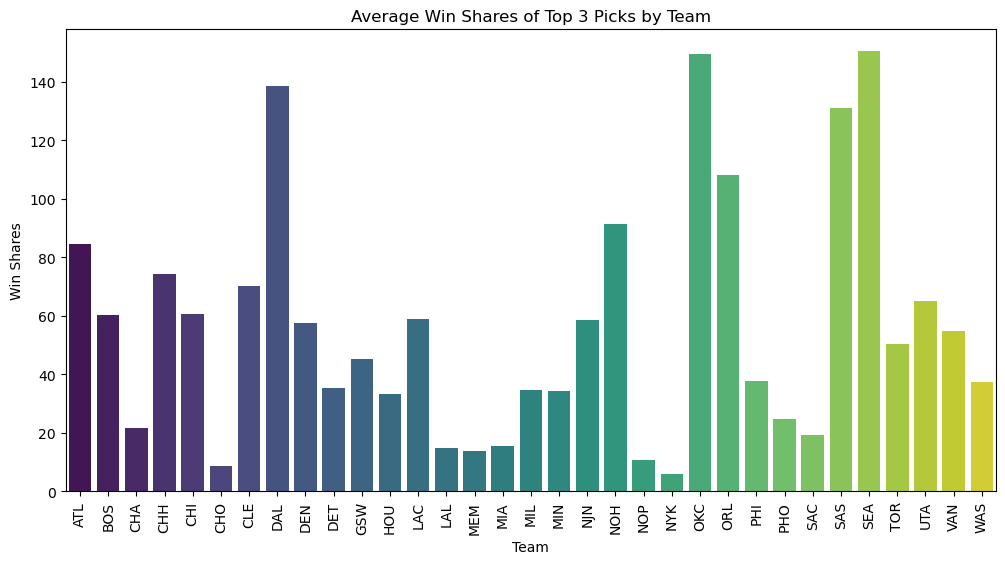

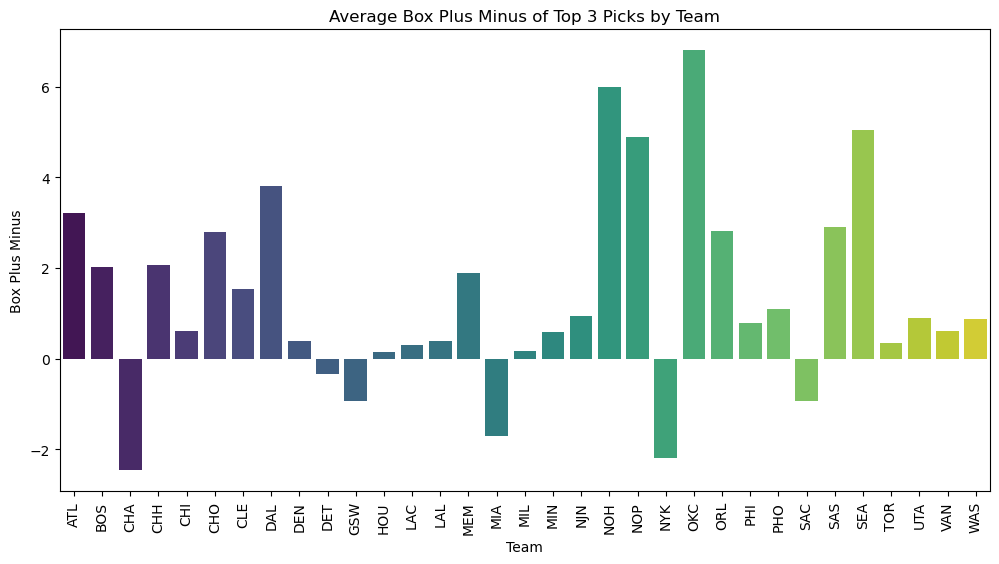

In [46]:
# Filter for top 3 picks
top_3_picks = nba_draft_data[nba_draft_data['overall_pick'] <= 3]

# Performance metrics to analyze
metrics = ['years_active', 'points_per_game', 'average_total_rebounds', 'average_assists', 'win_shares', 'box_plus_minus']

# Calculate average performance metrics for each team
team_performance = top_3_picks.groupby('team')[metrics].mean().reset_index()

# Visualize the performance metrics
def visualize_performance(metrics):
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=team_performance, x='team', y=metric, palette='viridis')
        plt.title(f'Average {metric.replace("_", " ").title()} of Top 3 Picks by Team')
        plt.xlabel('Team')
        plt.ylabel(metric.replace("_", " ").title())
        plt.xticks(rotation=90)
        plt.show()

visualize_performance(metrics)

#Top 3 Picks: Career Longevity vs Points Per Game

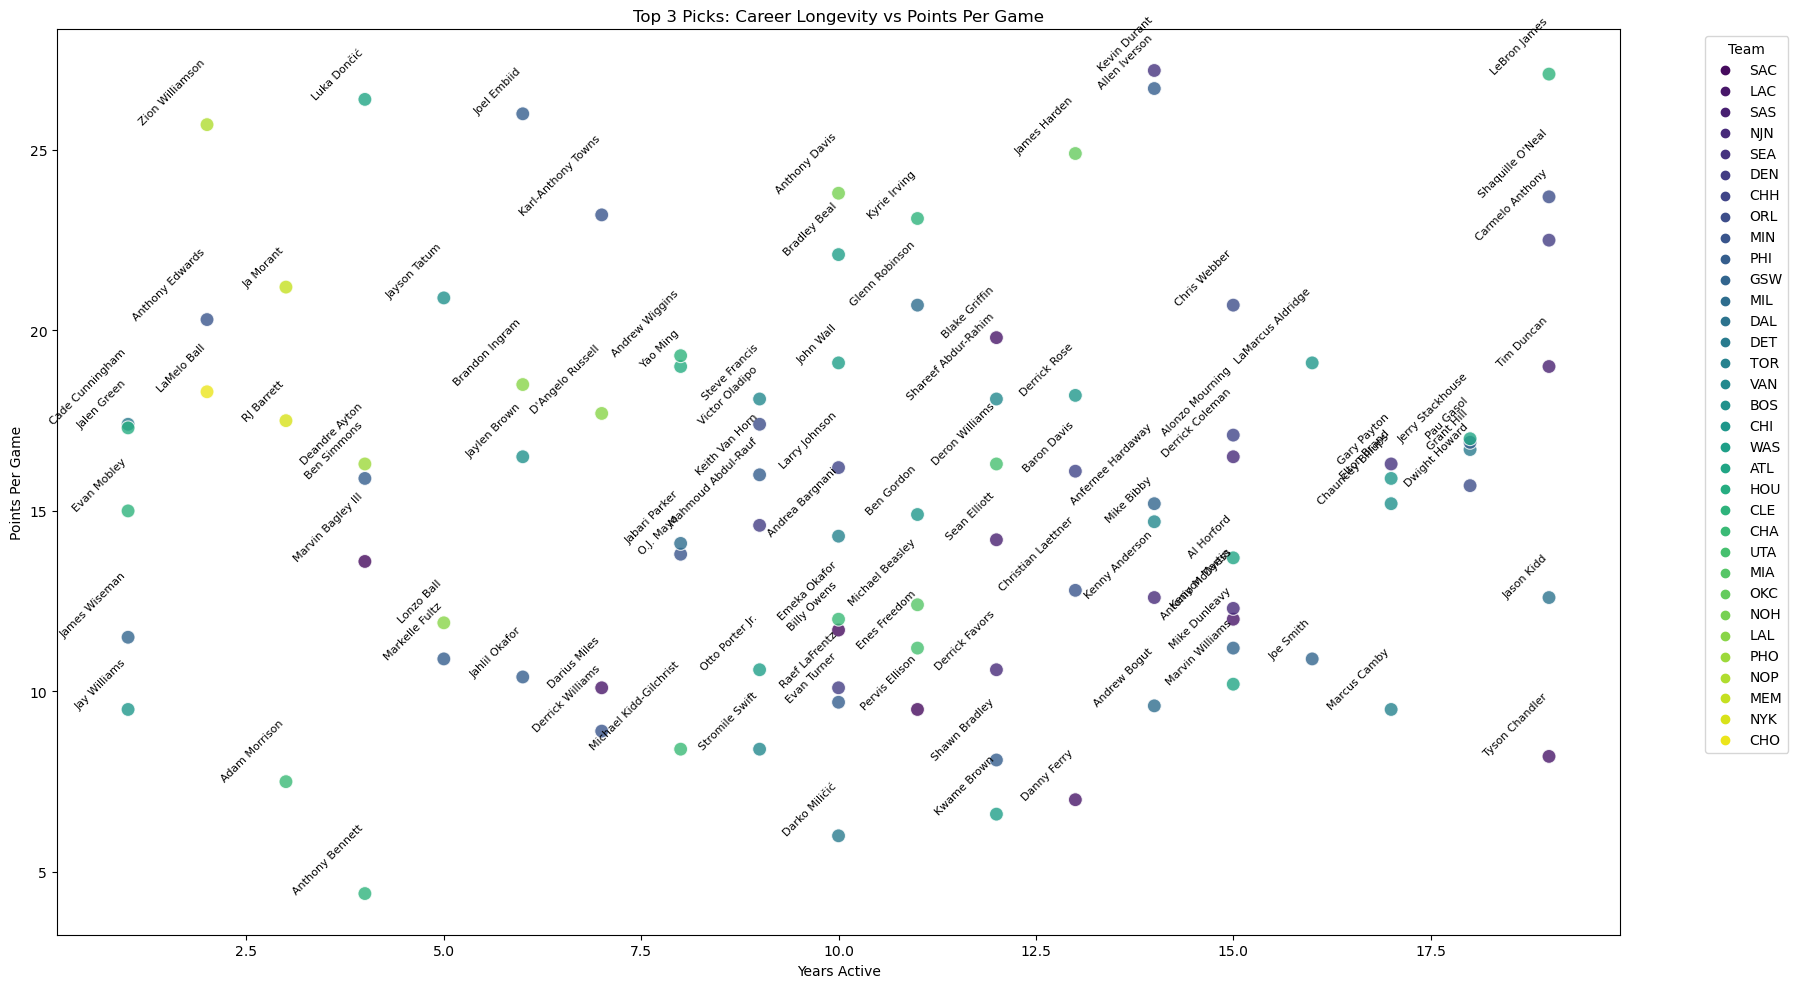

In [47]:
# Filter for top 3 picks
top_3_picks = nba_draft_data[nba_draft_data['overall_pick'] <= 3]

# Create a larger plot
plt.figure(figsize=(18, 10))
scatter = sns.scatterplot(
    data=top_3_picks,
    x='years_active',
    y='points_per_game',
    hue='team',
    palette='viridis',
    s=100,
    alpha=0.8
)

# Adjust text positions
for i, row in top_3_picks.iterrows():
    plt.text(row['years_active'], row['points_per_game'], row['player'], fontsize=8, ha='right', rotation=45)

plt.title('Top 3 Picks: Career Longevity vs Points Per Game')
plt.xlabel('Years Active')
plt.ylabel('Points Per Game')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Performance metrics by decade

/var/folders/sh/8jrc1l412v3gtlzcz2bx_qcw0000gn/T/ipykernel_29956/1836839960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_picks['decade'] = (top_3_picks['year'] // 10) * 10


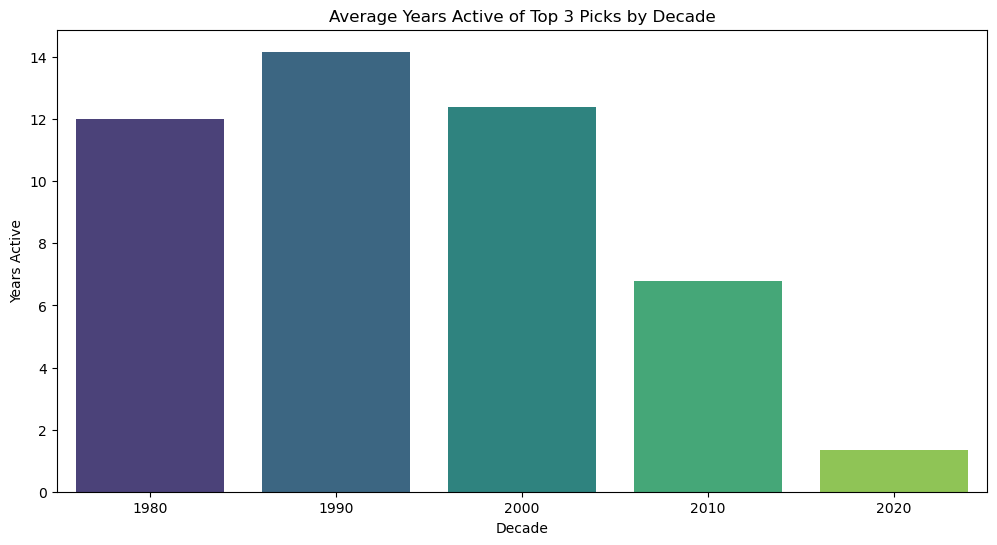

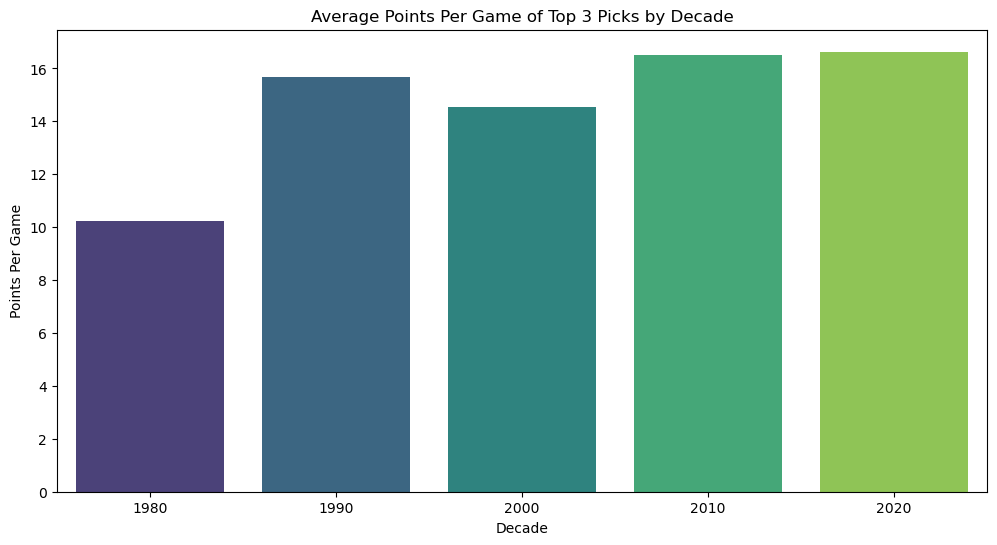

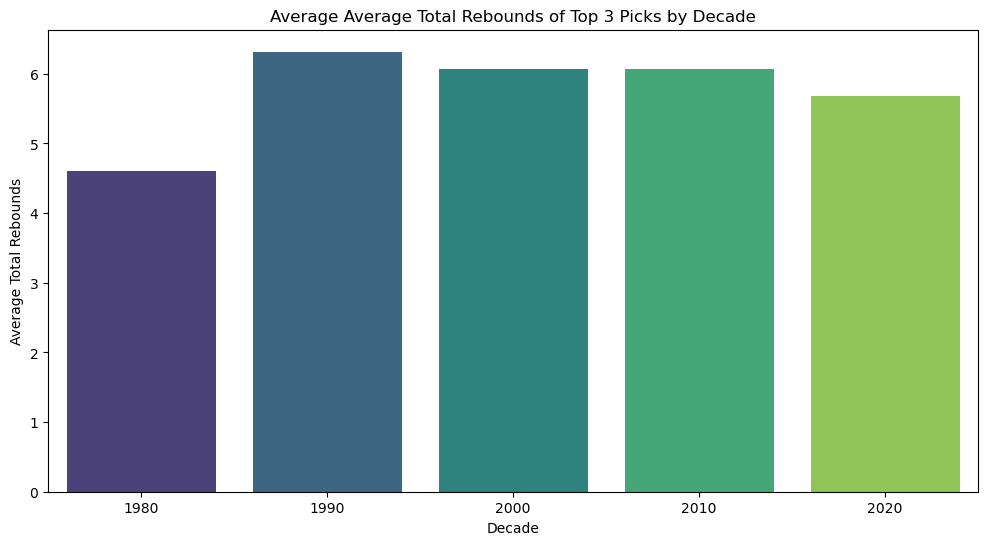

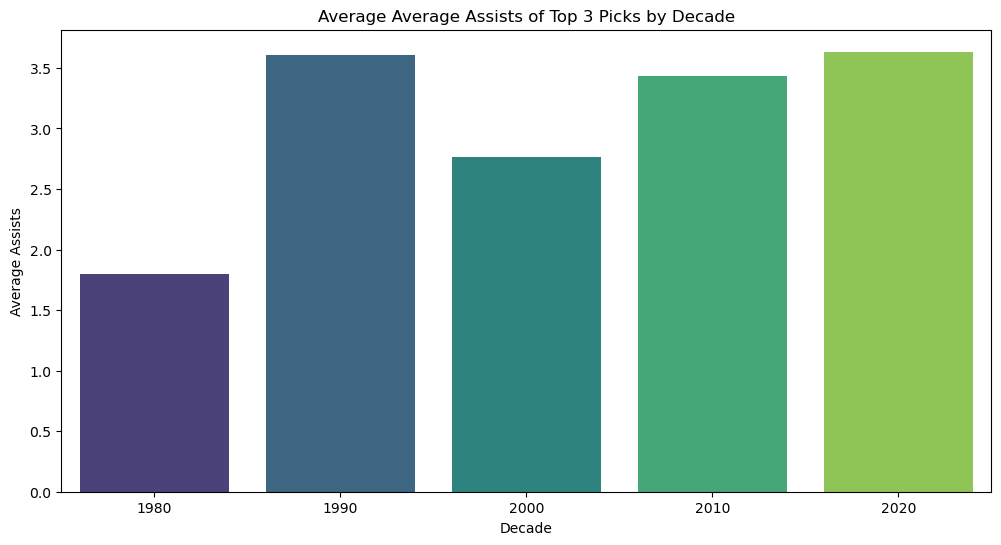

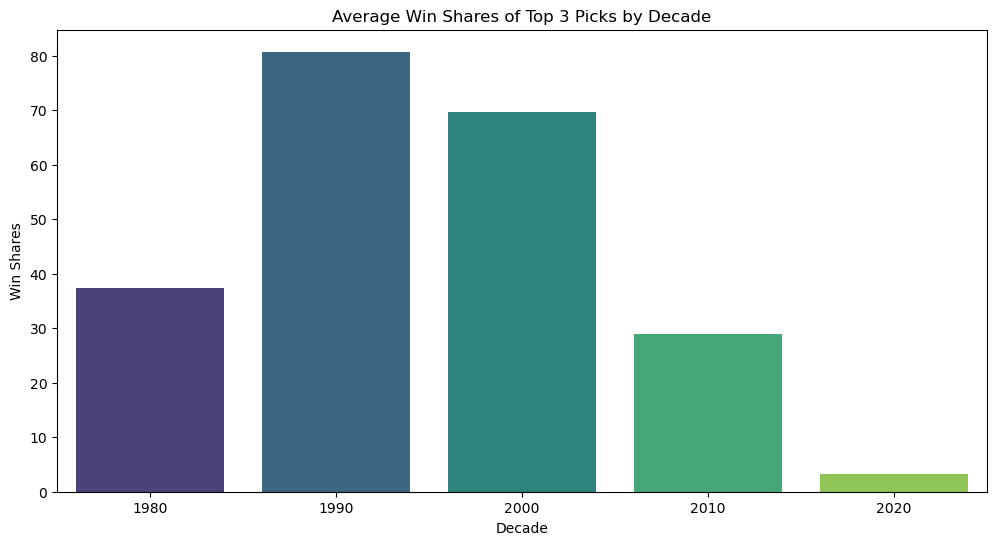

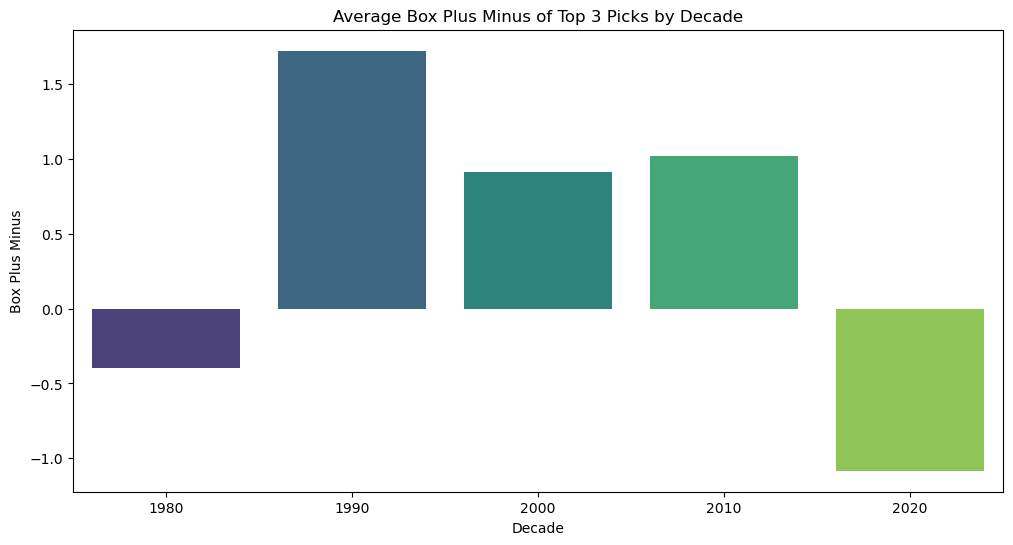

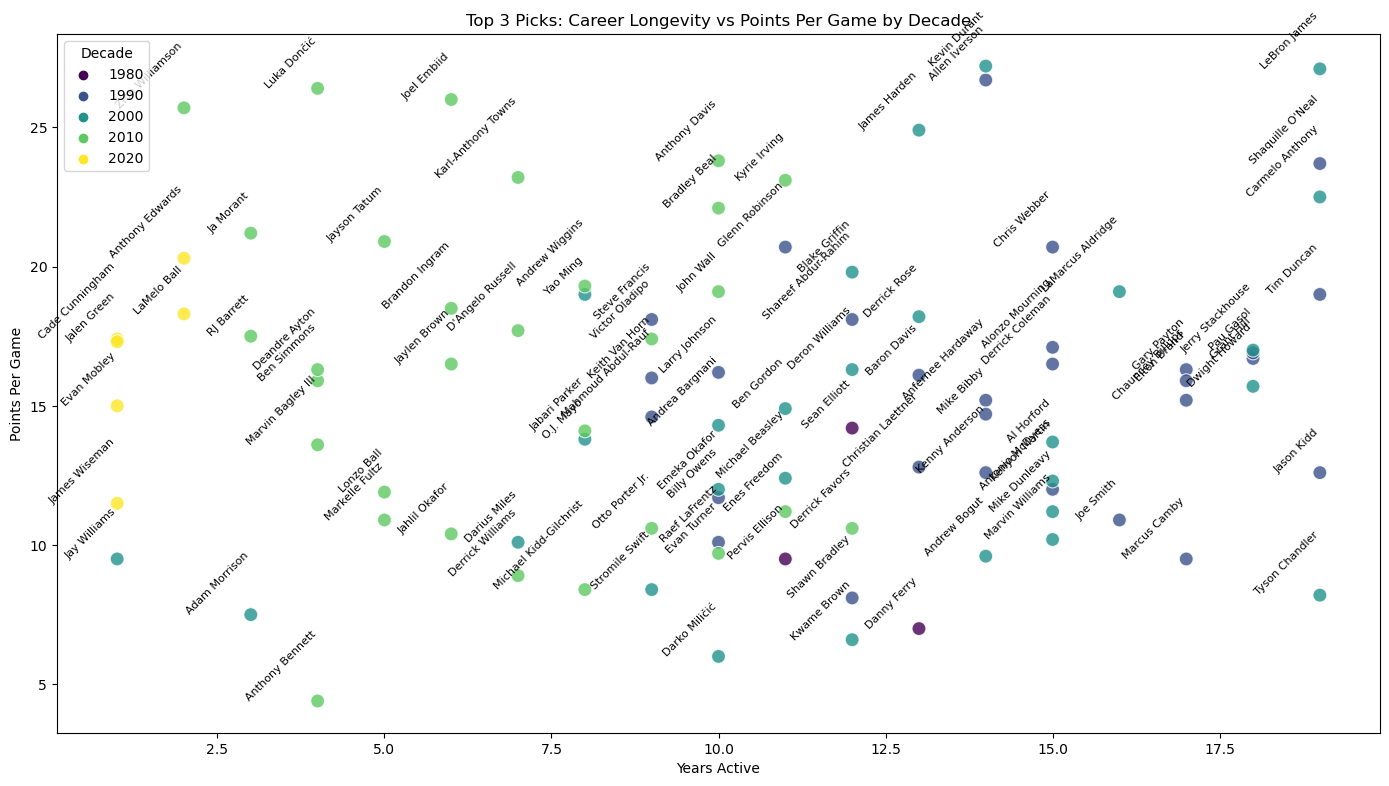

In [48]:
# Adding a decade column to the dataset
nba_draft_data['decade'] = (nba_draft_data['year'] // 10) * 10

# Filter for top 3 picks and add decade column
top_3_picks['decade'] = (top_3_picks['year'] // 10) * 10

# Calculate average performance metrics for each decade
decade_performance = top_3_picks.groupby('decade')[metrics].mean().reset_index()

# Visualize the performance metrics by decade
def visualize_decade_performance(metrics):
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=decade_performance, x='decade', y=metric, palette='viridis')
        plt.title(f'Average {metric.replace("_", " ").title()} of Top 3 Picks by Decade')
        plt.xlabel('Decade')
        plt.ylabel(metric.replace("_", " ").title())
        plt.show()

visualize_decade_performance(metrics)

# Scatter plot for career longevity vs points per game by decade
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top_3_picks,
    x='years_active',
    y='points_per_game',
    hue='decade',
    palette='viridis',
    s=100,
    alpha=0.8
)

for i, row in top_3_picks.iterrows():
    plt.text(row['years_active'], row['points_per_game'], row['player'], fontsize=8, ha='right', rotation=45)

plt.title('Top 3 Picks: Career Longevity vs Points Per Game by Decade')
plt.xlabel('Years Active')
plt.ylabel('Points Per Game')
plt.legend(title='Decade')
plt.tight_layout()
plt.show()


#Win shares for top 5 players

In [49]:
# Filter for top 3 picks
top_3_picks = nba_draft_data[nba_draft_data['overall_pick'] <= 3]

# Sort by win shares and select the top 5 players
top_5_win_shares = top_3_picks.sort_values(by='win_shares', ascending=False).head(5)

# Display the top 5 players
print(top_5_win_shares[['player', 'year', 'team', 'win_shares', 'points_per_game', 'years_active']])

                player  year team  win_shares  points_per_game  years_active
785       LeBron James  2003  CLE       249.5             27.1          19.0
440         Tim Duncan  1997  SAS       206.4             19.0          19.0
162   Shaquille O'Neal  1992  ORL       181.7             23.7          19.0
1023      Kevin Durant  2007  SEA       155.2             27.2          14.0
1144      James Harden  2009  OKC       149.6             24.9          13.0
